# EDA Hackathon


## PUBG Dataset
  PUBG, short for PLAYERS UNKNOWN'S BATTLE GROUNDS, is an online multiplayer battle royale game. It is a type of large-scale last man standing deathmatch where players fight to remain the last alive. Players can choose to enter the match solo, duo, or with a small team of up to four people. The last person or team alive wins the match.  
Each match starts with players parachuting from a plane onto one of four maps, with areas approximately 8 x 8 kilometers, 6 x 6 kilometers, and 4 x 4 kilometers in size.  
  The plane's flight path across the map varies with each round, requiring players to quickly determine the best time to eject and parachute to the ground. The players start with no gear, once the land the players can search buildings, ghost towns and other sites to find weapons, vehicles, armor, and other equipment. These items are precedurally distributed throughout the map at the start of a match, with certain high-risk zones typically having better equipment. Killed players can be looted to acquire their gear as well.  
  Every few minutes, the playable area of the map begins to shrink down towards a random location, with any player caught outside the safe area taking damage incrementally, and eventually being eliminated if the safe zone is not entered in time; in dame, the players see the boundary as a shimmering blue wall that contracts over time. This results in a more confined map, in turn increasing the chances of encounters. During the course of the match, random regions of the map are highlighted in red and bombed, posing a threat to players who remain in that area. In either of the 2 cases, the players are warned a few minutes before these events, giving them time to relocate to safety.  
  A plane will fly over various parts of the playable map occasionally at random, or wherever a player uses a flare gun, and drops a loot package, containing items which are typically unobtainable during normal gameplay. These packages emit highly visible red smoke, drawing interested players near it and creating further confrontations. On average, a full round takes no more than 30 minutes.  
  At the completion of each round, players gain in-gamee currency based on their performance. The currency is used to purchase crates which containcosmetic items for character or weapon customization. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
pubg = pd.read_csv('pubg_data.csv')

In [9]:
pubg.shape

(125128, 30)

In [10]:
pubg.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0.0,0.0,25.93,0.0,0.0,0.0,84.0,1437.0,0.0,0.0,0.000,1403.0,squad-fpp,31.0,29.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,151.30,1.0,1525.0,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0.0,0.0,36.71,0.0,0.0,0.0,57.0,1225.0,0.0,0.0,0.000,1971.0,squad-fpp,30.0,30.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1918.00,7.0,1516.0,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0.0,1.0,47.73,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.000,1741.0,solo-fpp,96.0,89.0,1516.0,0.0,4088.0,0.0,0.0,0.0,0.0,820.00,7.0,0.0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0.0,0.0,0.00,0.0,0.0,0.0,56.0,1286.0,0.0,0.0,0.000,1738.0,squad-fpp,28.0,27.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,38.81,0.0,1515.0,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0.0,2.0,100.00,0.0,0.0,3.0,31.0,0.0,1.0,1.0,7.737,2193.0,solo,99.0,95.0,1482.0,0.0,918.4,0.0,0.0,0.0,0.0,1721.00,5.0,0.0,0.6429


In [11]:
pubg.drop('Unnamed: 0', axis = 1, inplace = True)

In [12]:
pubg.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000,125127.000000
mean,0.234410,1.106572,130.805785,0.656941,0.225890,1.369848,47.574568,504.606688,0.922870,0.543232,23.105512,1579.007768,44.464560,42.970014,892.731169,0.163810,603.737301,0.003460,4.541247,0.023984,0.007672,1155.141673,3.666699,606.161356,0.473234
std,0.588665,1.718394,170.530765,1.147393,0.599419,2.679909,27.443193,627.349921,1.551833,0.711630,51.315740,258.788111,23.765193,23.230674,736.964053,0.471723,1495.069416,0.076146,30.279610,0.167177,0.090138,1185.933582,2.440767,739.674214,0.307026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,209.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.800000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,84.710000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,1438.000000,30.000000,30.000000,1444.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,682.300000,3.000000,0.000000,0.458300
75%,0.000000,2.000000,185.500000,1.000000,0.000000,2.000000,71.000000,1171.000000,1.000000,1.000000,21.340000,1851.000000,49.000000,47.000000,1500.000000,0.000000,0.065900,0.000000,0.000000,0.000000,0.000000,1979.000000,5.000000,1495.000000,0.740700
max,12.000000,24.000000,3621.000000,23.000000,15.000000,48.000000,100.000000,2083.000000,38.000000,16.000000,1001.000000,2237.000000,100.000000,100.000000,4150.000000,17.000000,29430.000000,9.000000,1246.000000,4.000000,3.000000,12970.000000,52.000000,1970.000000,1.000000


In [13]:
pubg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125128 entries, 0 to 125127
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               125128 non-null  object 
 1   groupId          125128 non-null  object 
 2   matchId          125127 non-null  object 
 3   assists          125127 non-null  float64
 4   boosts           125127 non-null  float64
 5   damageDealt      125127 non-null  float64
 6   DBNOs            125127 non-null  float64
 7   headshotKills    125127 non-null  float64
 8   heals            125127 non-null  float64
 9   killPlace        125127 non-null  float64
 10  killPoints       125127 non-null  float64
 11  kills            125127 non-null  float64
 12  killStreaks      125127 non-null  float64
 13  longestKill      125127 non-null  float64
 14  matchDuration    125127 non-null  float64
 15  matchType        125127 non-null  object 
 16  maxPlace         125127 non-null  floa

In [14]:
pubg.isna().sum()

Id                 0
groupId            0
matchId            1
assists            1
boosts             1
damageDealt        1
DBNOs              1
headshotKills      1
heals              1
killPlace          1
killPoints         1
kills              1
killStreaks        1
longestKill        1
matchDuration      1
matchType          1
maxPlace           1
numGroups          1
rankPoints         1
revives            1
rideDistance       1
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64

In [15]:
null_columns=pd.DataFrame({'Columns':pubg.isna().sum().index,'No. of Null values':pubg.isna().sum().values,'Percentage':pubg.isna().sum().values/pubg.shape[0]})

In [16]:
null_columns

,Columns,No. of Null values,Percentage
0,Id,0,0.000000
1,groupId,0,0.000000
2,matchId,1,0.000008
3,assists,1,0.000008
4,boosts,1,0.000008
5,damageDealt,1,0.000008
6,DBNOs,1,0.000008
7,headshotKills,1,0.000008
8,heals,1,0.000008
9,killPlace,1,0.000008


In [17]:
pubg.dropna(inplace=True)

In [18]:
pubg.shape

(125127, 29)

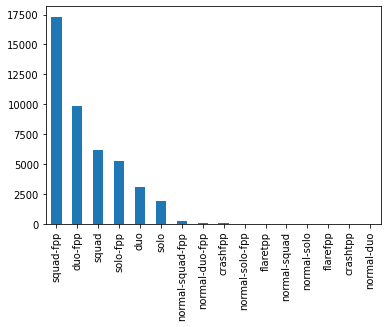

In [19]:
pubg.groupby('matchId')['matchType'].first().value_counts().plot.bar()

In [20]:
for i in ['Id', 'groupId', 'matchId']:
  print("Unique values in column ", i, ' is: ', pubg[i].nunique())

Unique values in column  Id  is:  125127
Unique values in column  groupId  is:  121324
Unique values in column  matchId  is:  44176


The match types can be classified into 3 types: Solo, Duo, Squad

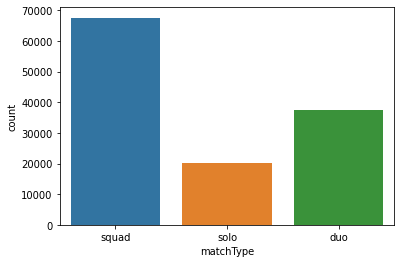

In [21]:
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) else 'squad'
pubg['matchType'] = pubg['matchType'].apply(mapper)
sns.countplot(pubg['matchType'])

Here we can see that majority of the data is about squad matches with the least data being about solo matches.

## Univariate Analysis (Numeric Data)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5]),
 <a list of 6 Text major ticklabel objects>)

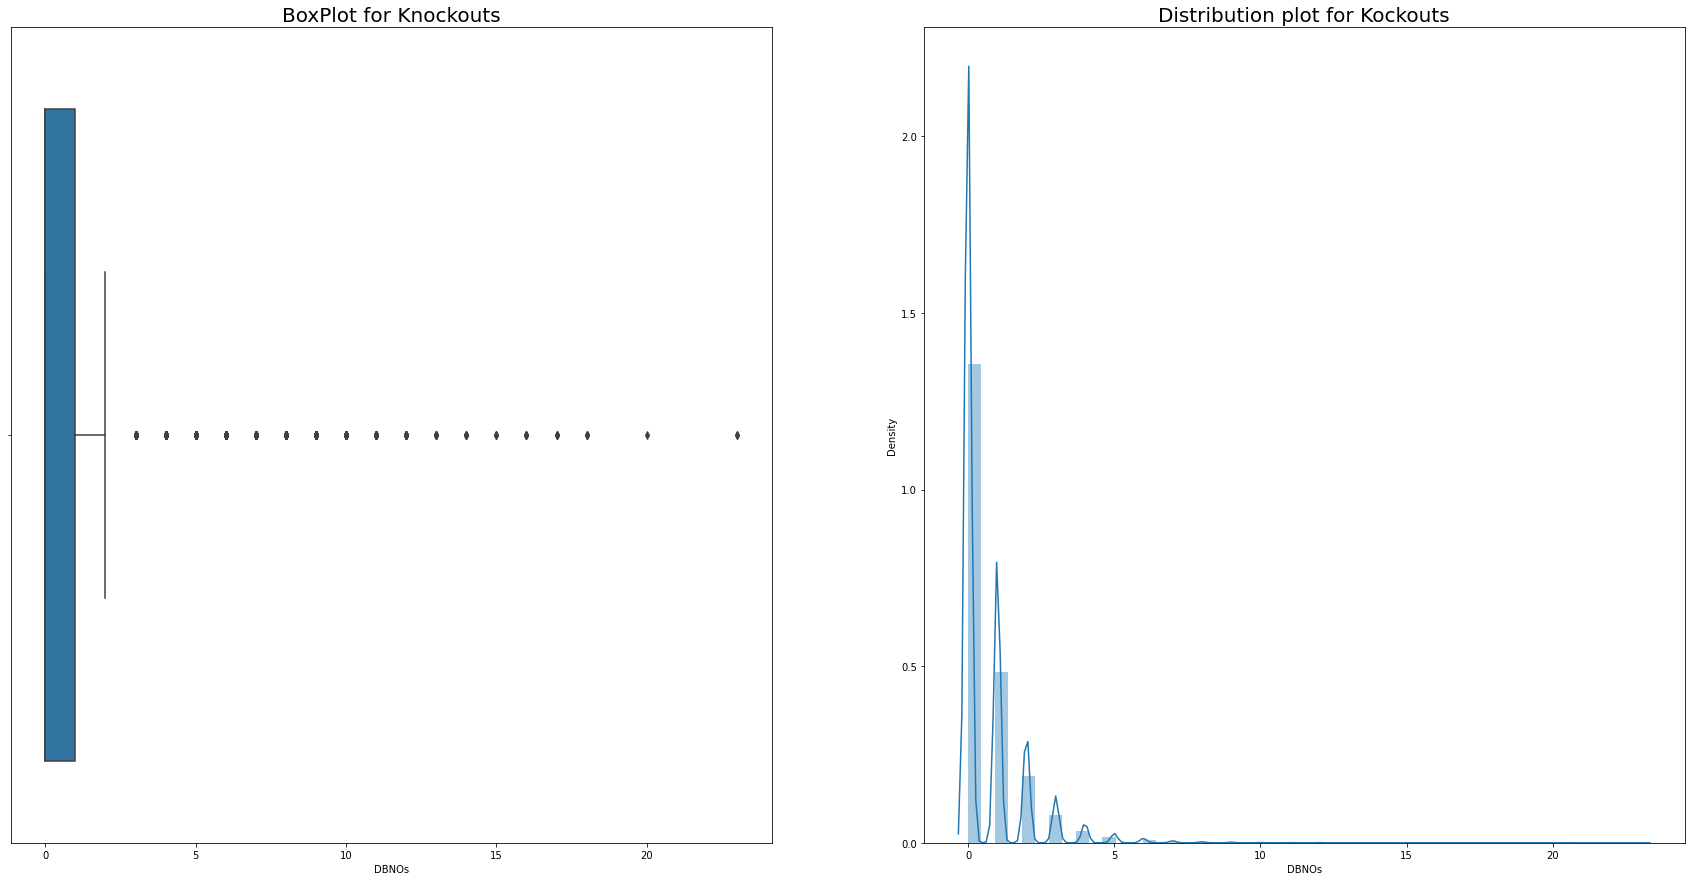

In [22]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['DBNOs'])
plt.title('BoxPlot for Knockouts', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['DBNOs'])
plt.title('Distribution plot for Kockouts', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

The above graph shows us that maximum number of players have knocked out less than 5 enemy players, while a few outliers show those players who have lnocked out more than 3 enemy players. We can also notice that the maximum number of enemy players knocked out by any player is around 22-23. 

(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

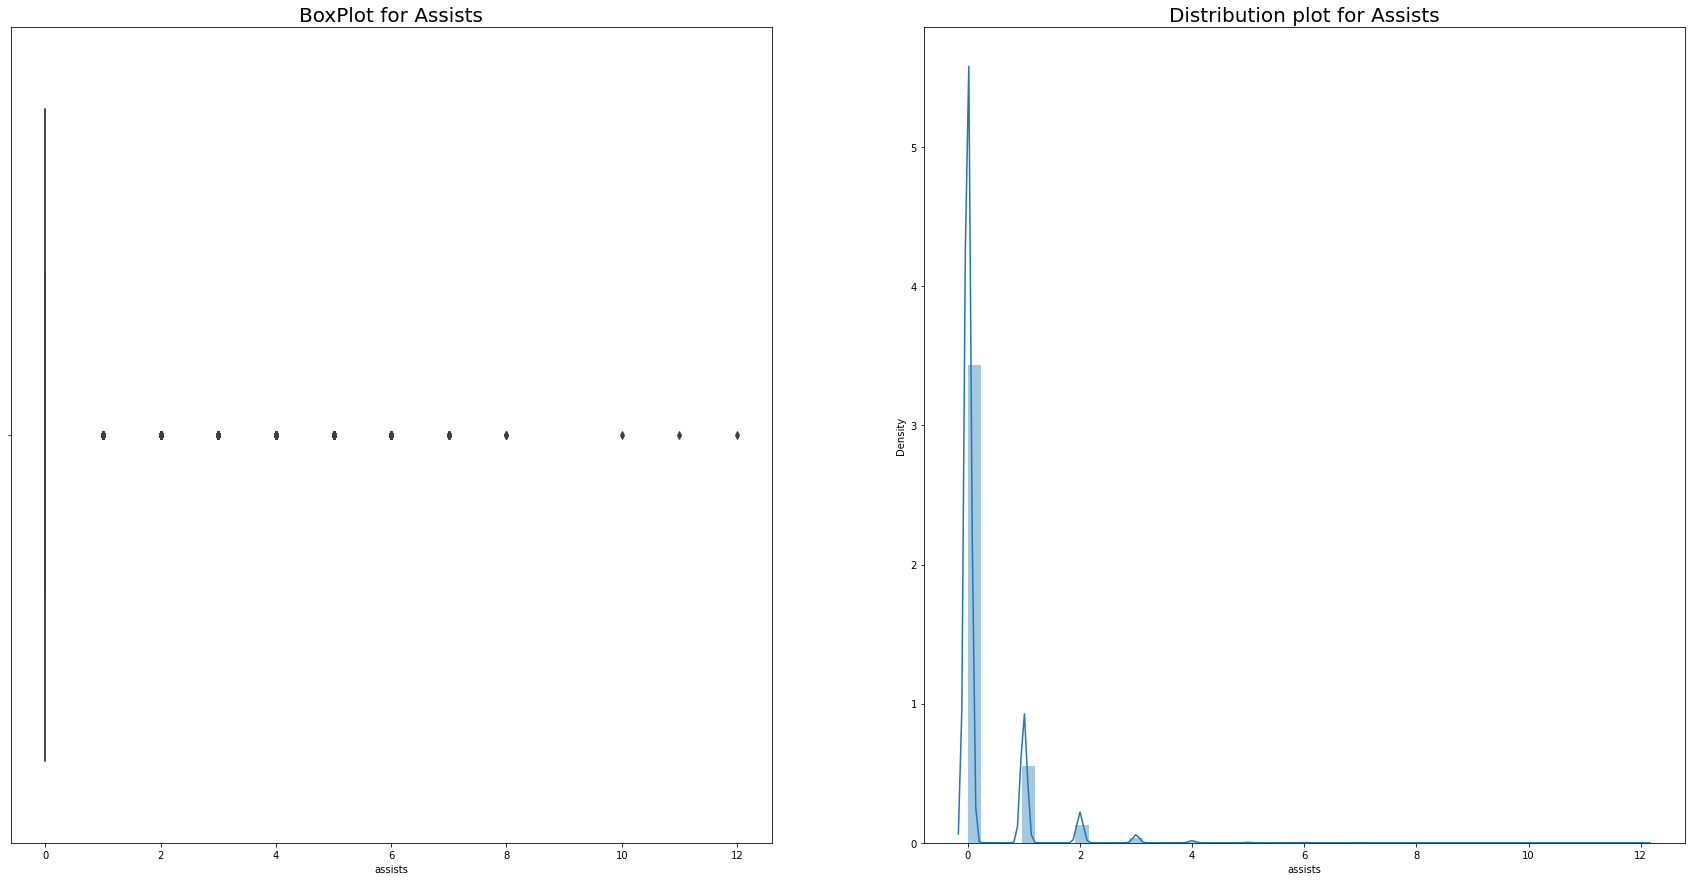

In [23]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['assists'])
plt.title('BoxPlot for Assists', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['assists'])
plt.title('Distribution plot for Assists', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

We can see that most of the players have injured 0 enemy players who were later killed by a teammate. However, a few outliers exist (9 in number). These outliers indicate the players who assisted their teammates in a kill. It can be seen that the maximum number of assisted kills by a team are 12.

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6]),
 <a list of 9 Text major ticklabel objects>)

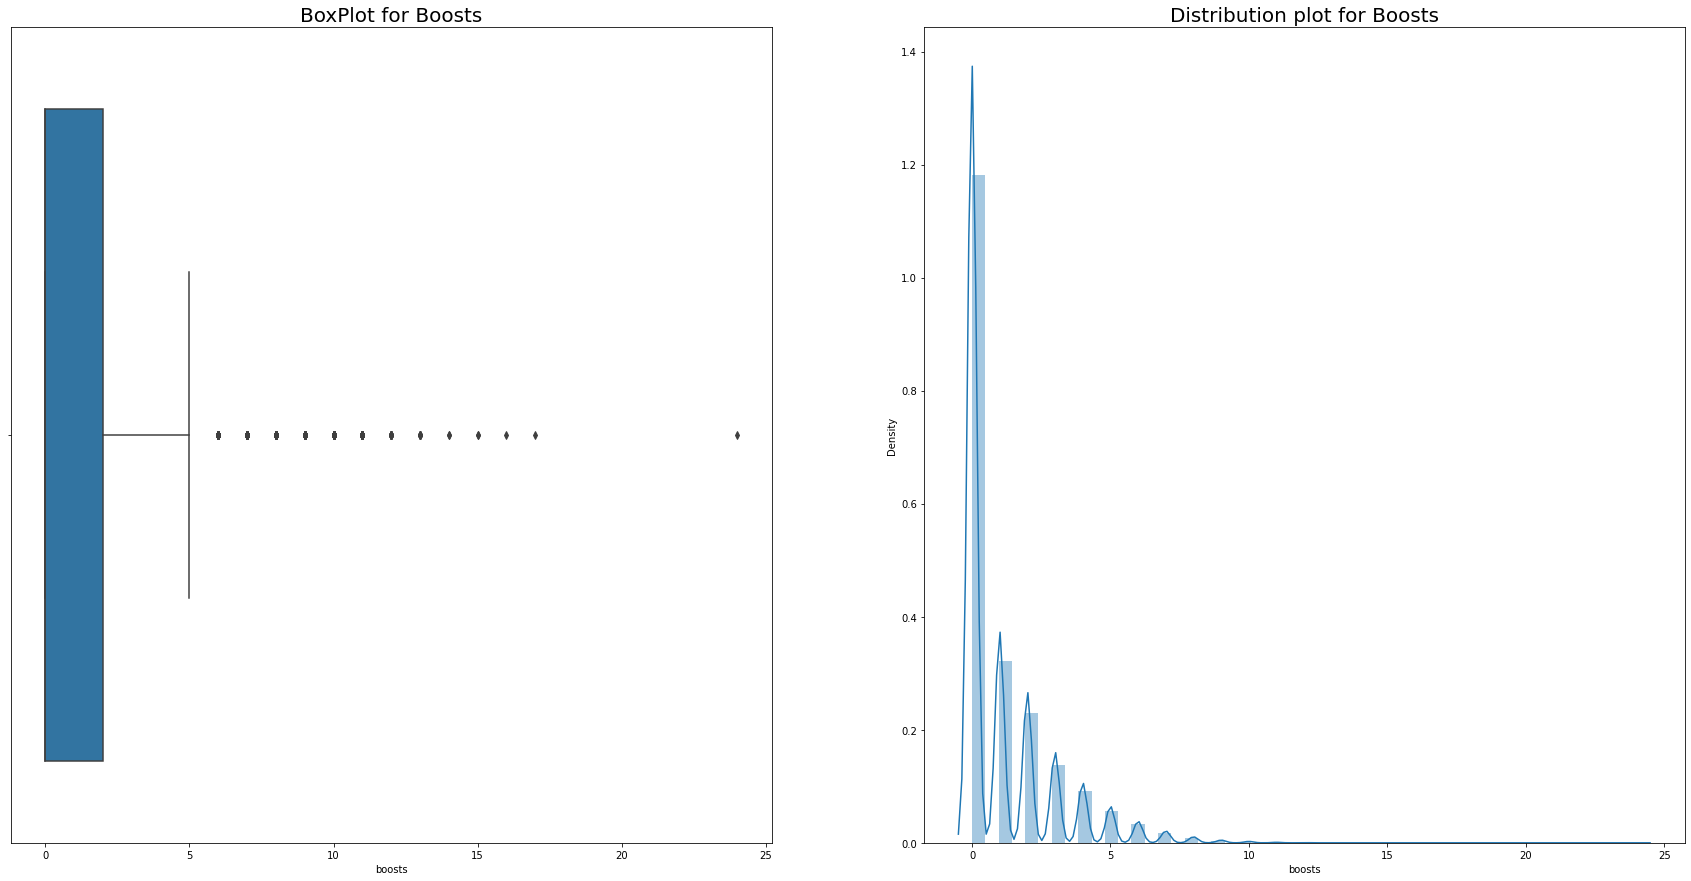

In [24]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['boosts'])
plt.title('BoxPlot for Boosts', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['boosts'])
plt.title('Distribution plot for Boosts', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

The above graph shows that the number of boost items used by most players lies below 5 with the existence of a few outliers indicating those players who used more than 5 boost items. The maximum number of boost items used by a player are around 24.

(array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008]),
 <a list of 9 Text major ticklabel objects>)

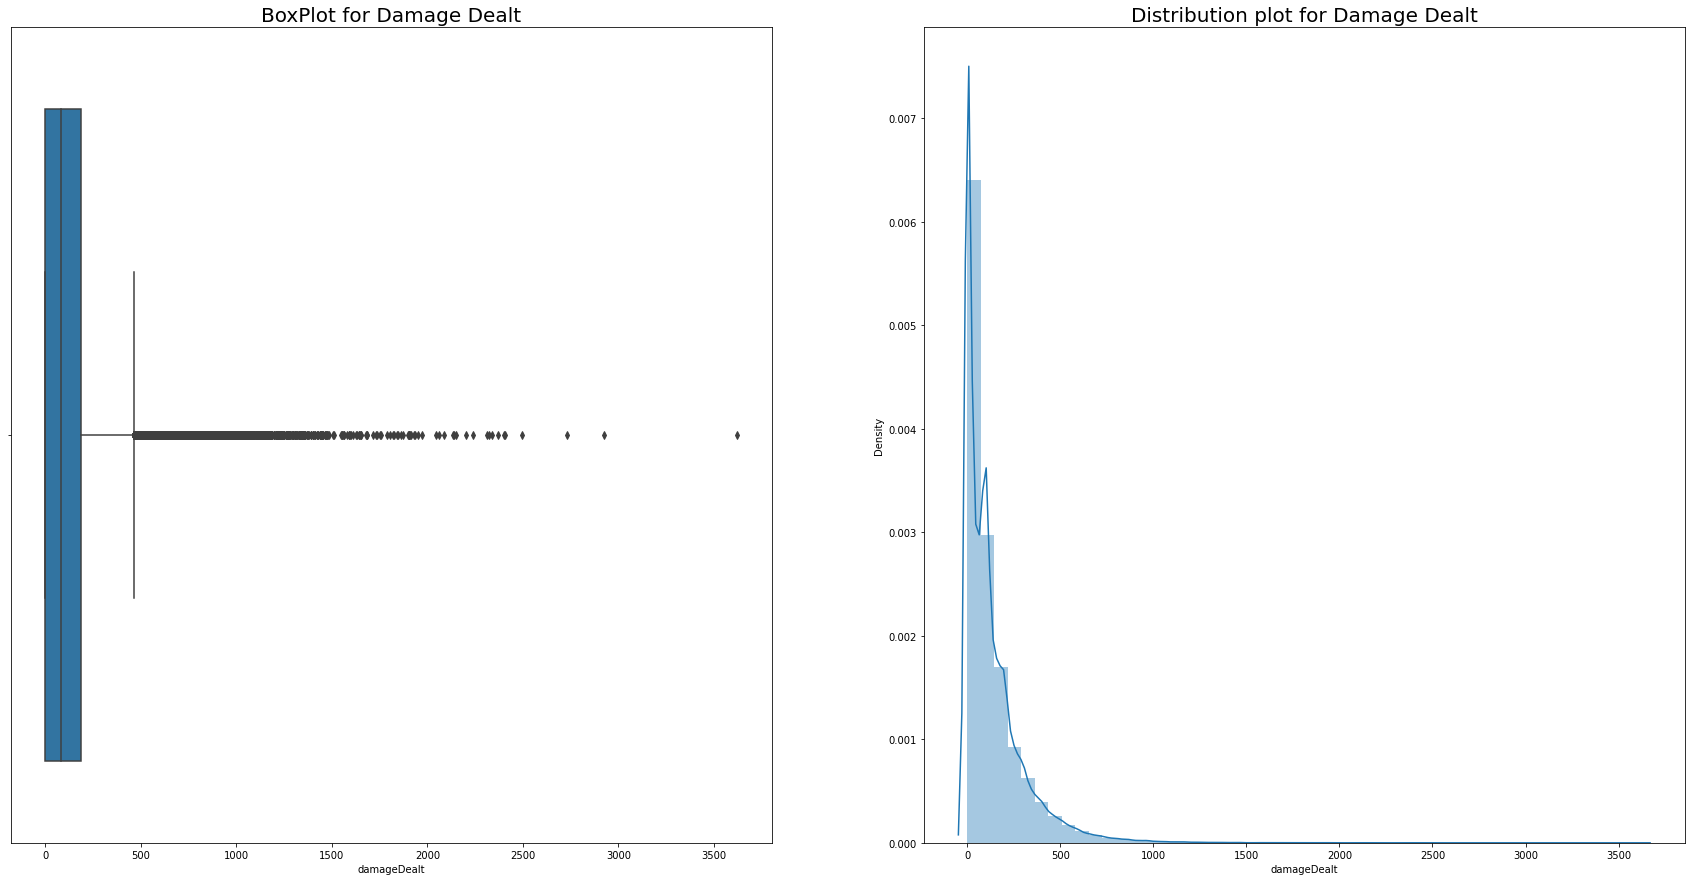

In [25]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['damageDealt'])
plt.title('BoxPlot for Damage Dealt', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['damageDealt'])
plt.title('Distribution plot for Damage Dealt', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

The above graph shows the total damage a player has dealt with. One should make a note of the fact that self inflicted damage has not been included in this damage score. One can notice that the maximum damage a player has dealt with is 2500, while a majority of the players have dealt damage less than 500, with the least being 0, i.e. the player was unscathed.

(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

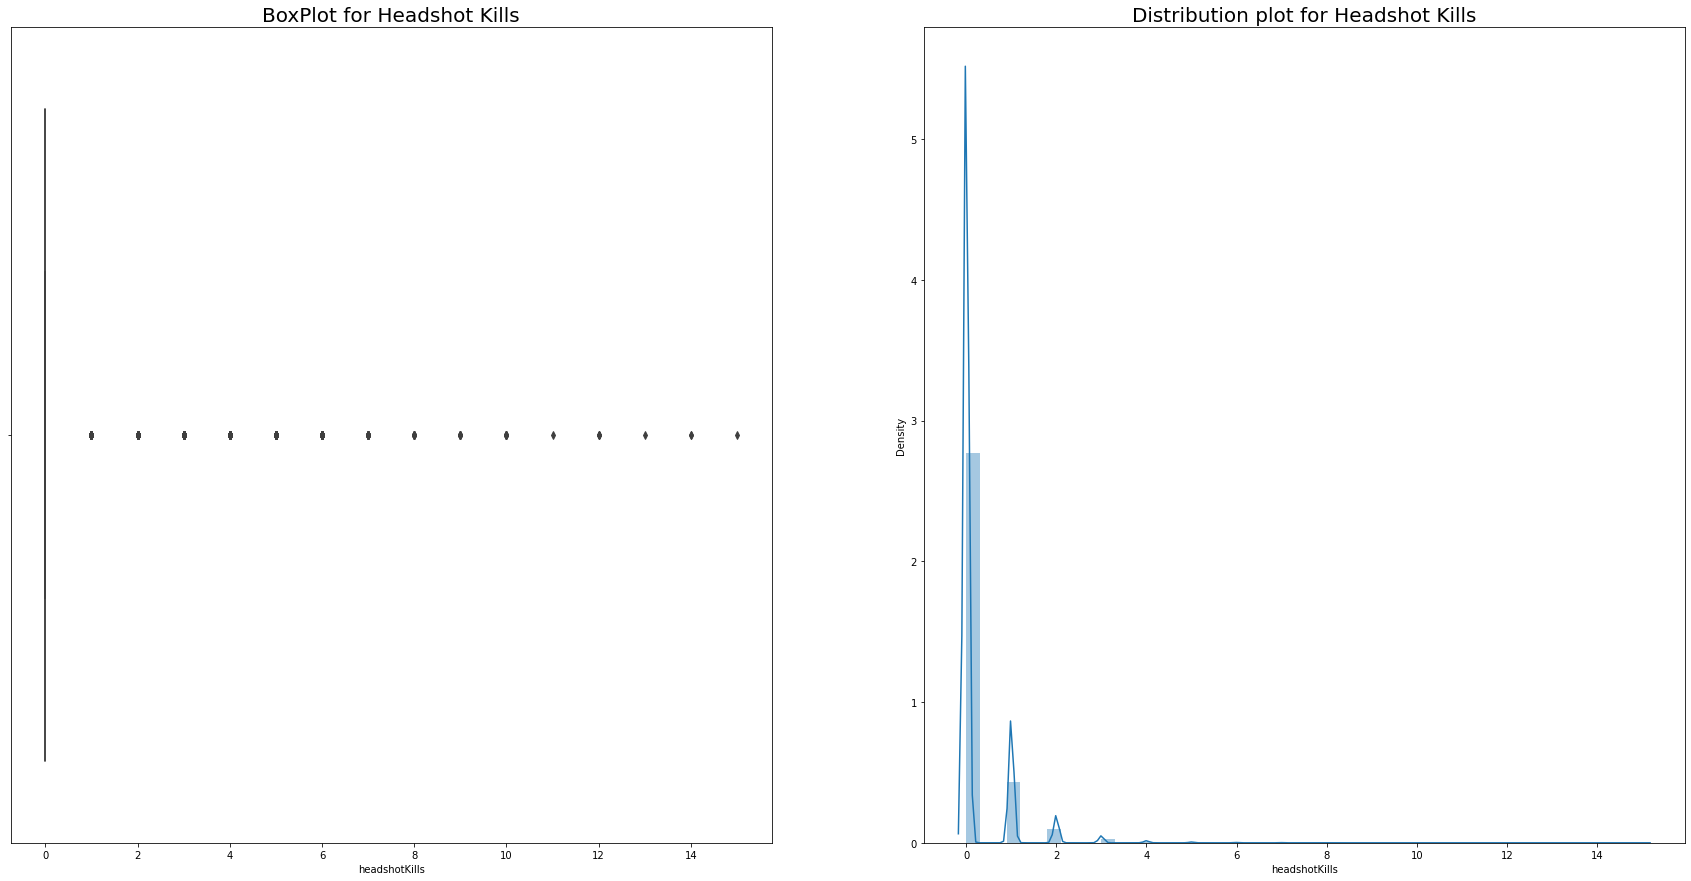

In [26]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['headshotKills'])
plt.title('BoxPlot for Headshot Kills', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['headshotKills'])
plt.title('Distribution plot for Headshot Kills', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

The above graph gives us an idea about the number of enemy kills that were caused by a headshot. We can see that barely 12 players have killed enemy players with a headshot. The maximum number of enemy players that a player killed by a headshot is found to be 12.

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

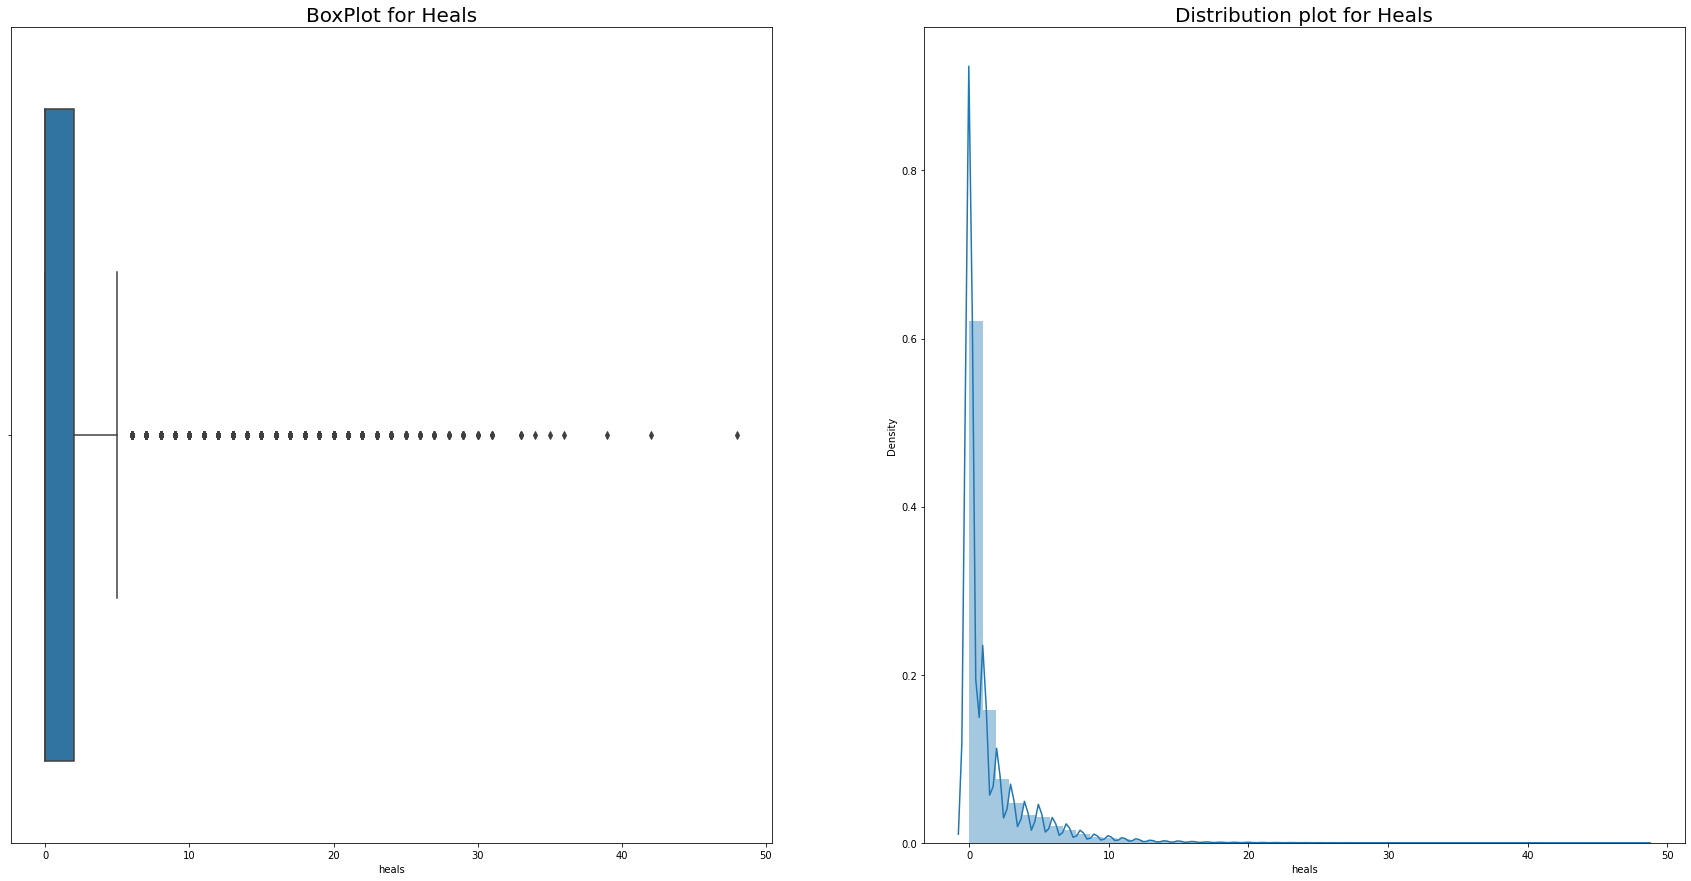

In [27]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['heals'])
plt.title('BoxPlot for Heals', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['heals'])
plt.title('Distribution plot for Heals', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

The boxplot above shows the number of healing items used by the different players. The least number of healing items used being 0 this also happens to be the mean value. We can also see the presence of outliers indicating those players who have used more than around 6 healing items. The maximum numberof healing items used by a player can be seen to be 42.

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6]),
 <a list of 9 Text major ticklabel objects>)

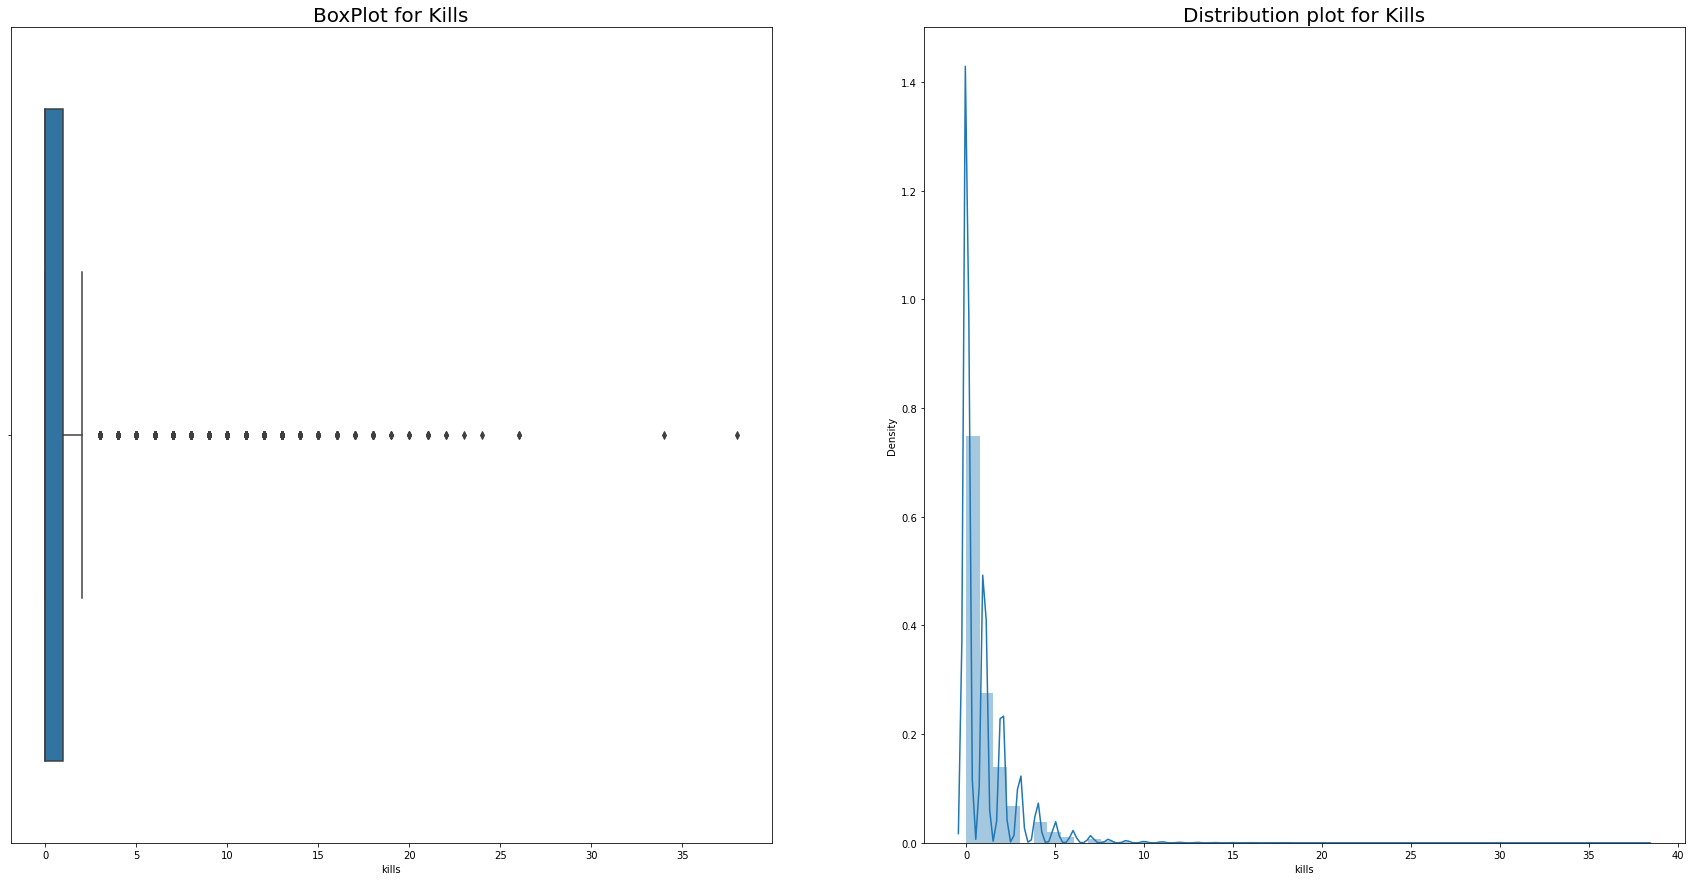

In [28]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['kills'])
plt.title('BoxPlot for Kills', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['kills'])
plt.title('Distribution plot for Kills', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

The above graph displays the number of enemy players killed by different players. We can see that a majority of the players have killed less than 5 enemy players. The existence of outliers indicates that (20) players exist who have killed more tha 4 players with the maximum number of kills obtained by a single player being 25.

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <a list of 7 Text major ticklabel objects>)

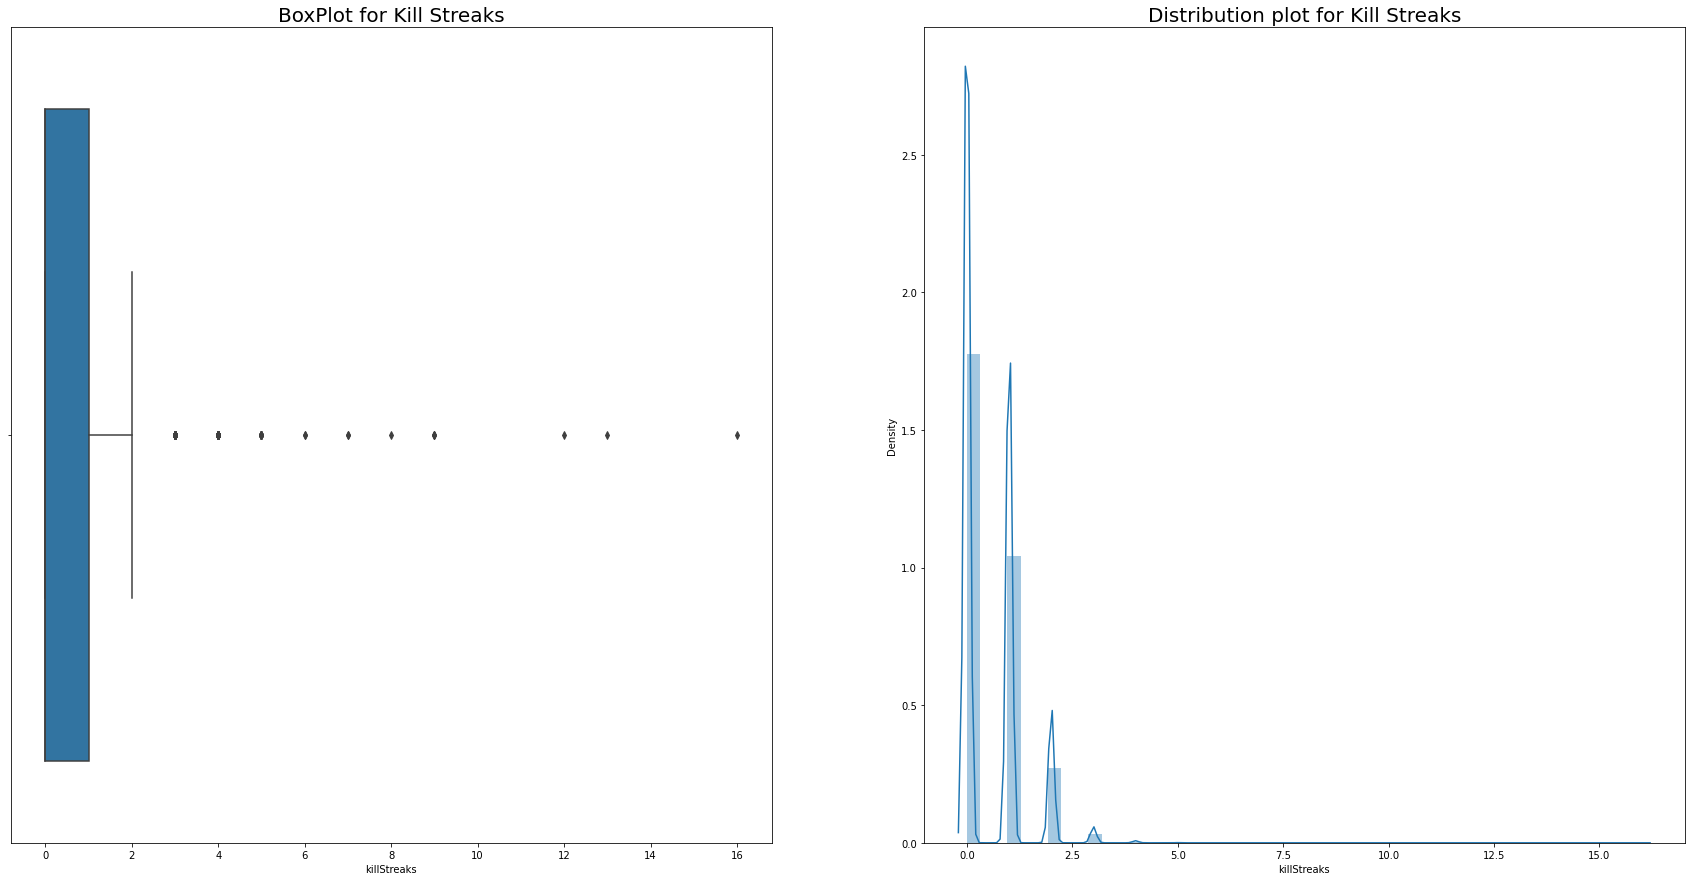

In [29]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['killStreaks'])
plt.title('BoxPlot for Kill Streaks', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['killStreaks'])
plt.title('Distribution plot for Kill Streaks', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

The boxplot above displays the maxmum number of enemy players that a player has killed in a short period of time, i.e. the kill streaks of the players. A majority of the players hae a kill streak of 2 kills. while the existence of a few outliers indicates that (4) players killed more than two enemy players in a short time obtaining a kill streak of greater than 2 with the highest being around 9.

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]),
 <a list of 7 Text major ticklabel objects>)

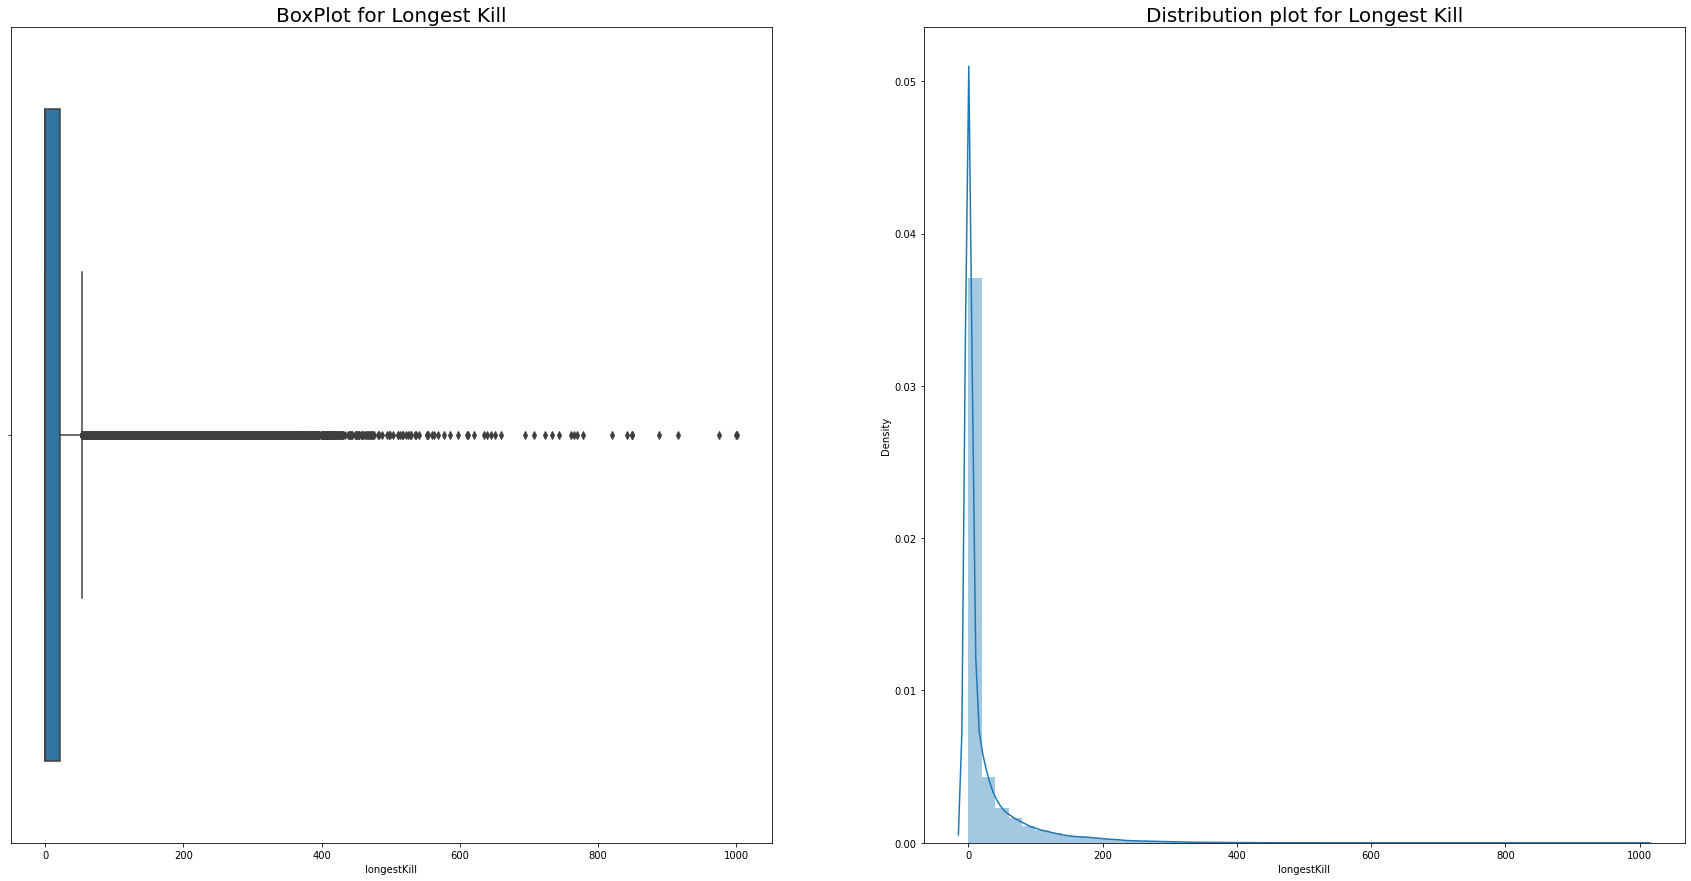

In [30]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['longestKill'])
plt.title('BoxPlot for Longest Kill', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['longestKill'])
plt.title('Distribution plot for Longest Kill', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

The above grpah shows the longest distance between the player and the player killed at the time of death of the various players. This however can be misleading since downing a player and driving away may lead to a large longestKill stat. However, from the above graph we can see that the highest value for the longestKill stat is 1000 meters
.

(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

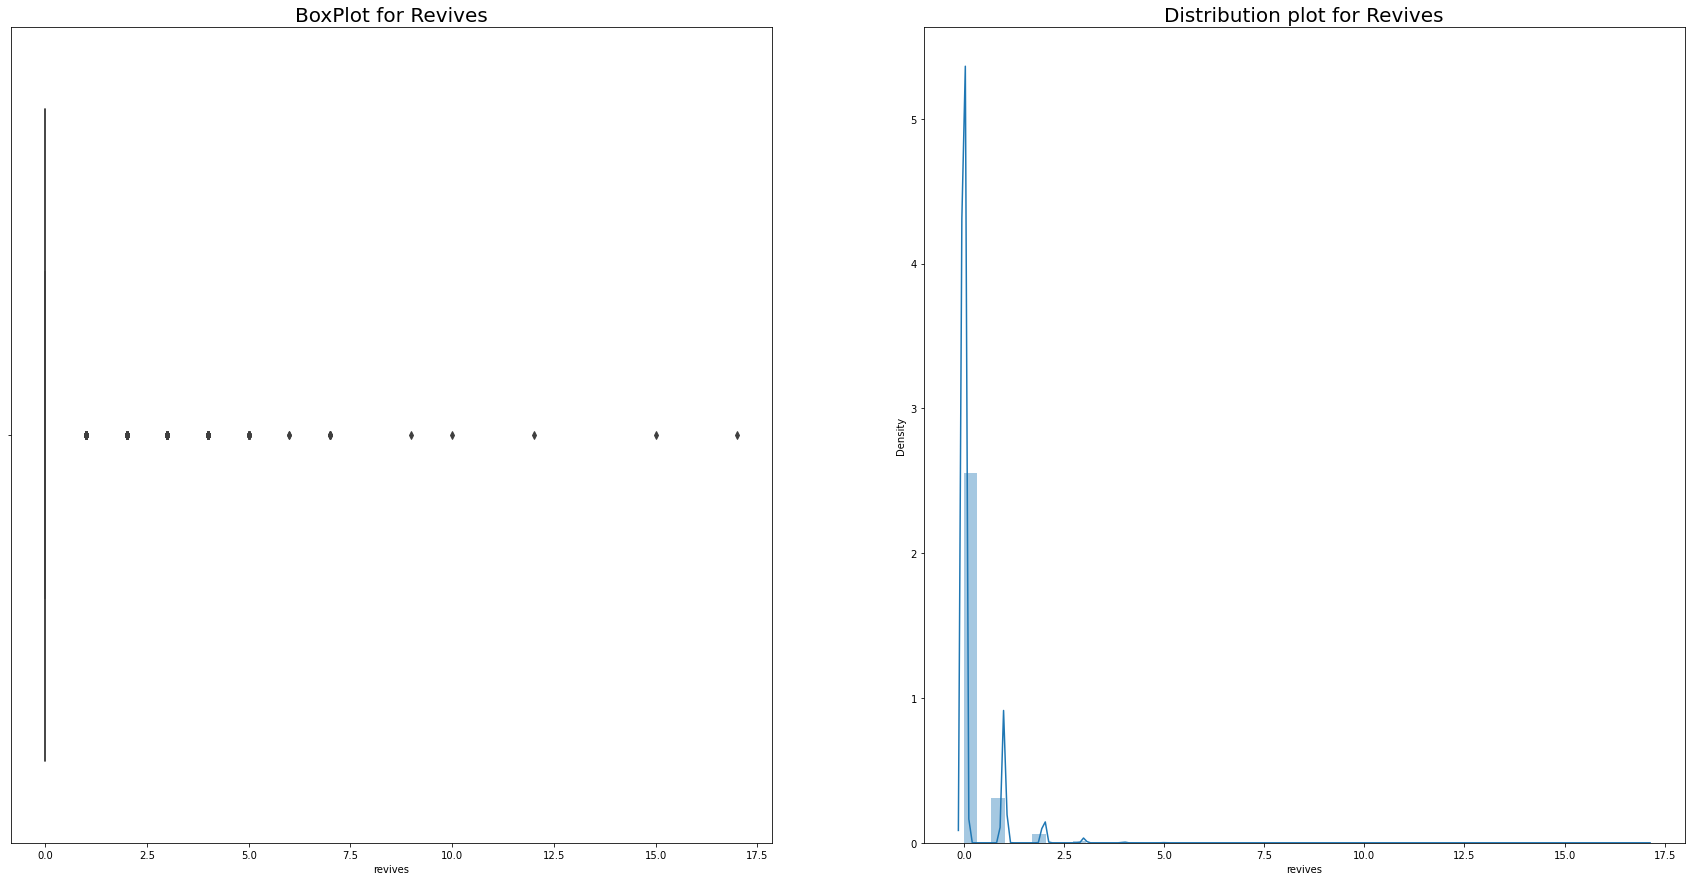

In [31]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['revives'])
plt.title('BoxPlot for Revives', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['revives'])
plt.title('Distribution plot for Revives', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

From the above graph we get the information abput the number of times a player has revived a teammate. We can see that most of the players haven't revived any teammate. While the outliers indicate 7 players who have revived their teammates. The maximum number of revives by a player are seen to be 10.  
However, this can be misleading since it is taking into account even those players who were playing a solo match thus, having no teammates. 

(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

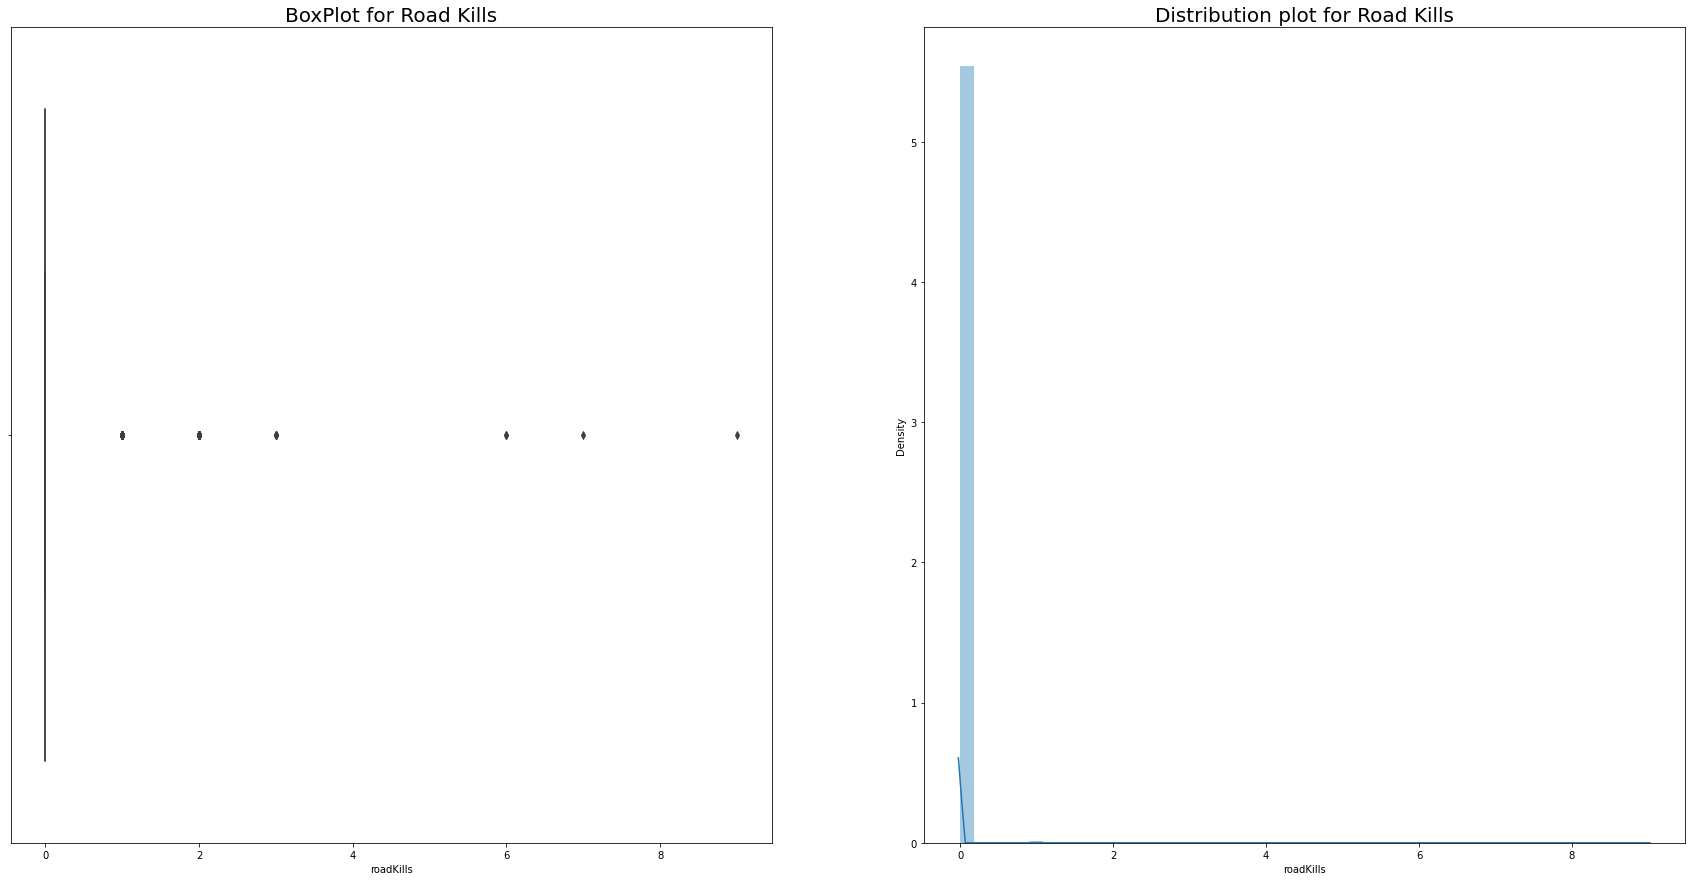

In [32]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['roadKills'])
plt.title('BoxPlot for Road Kills', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['roadKills'])
plt.title('Distribution plot for Road Kills', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ]),
 <a list of 6 Text major ticklabel objects>)

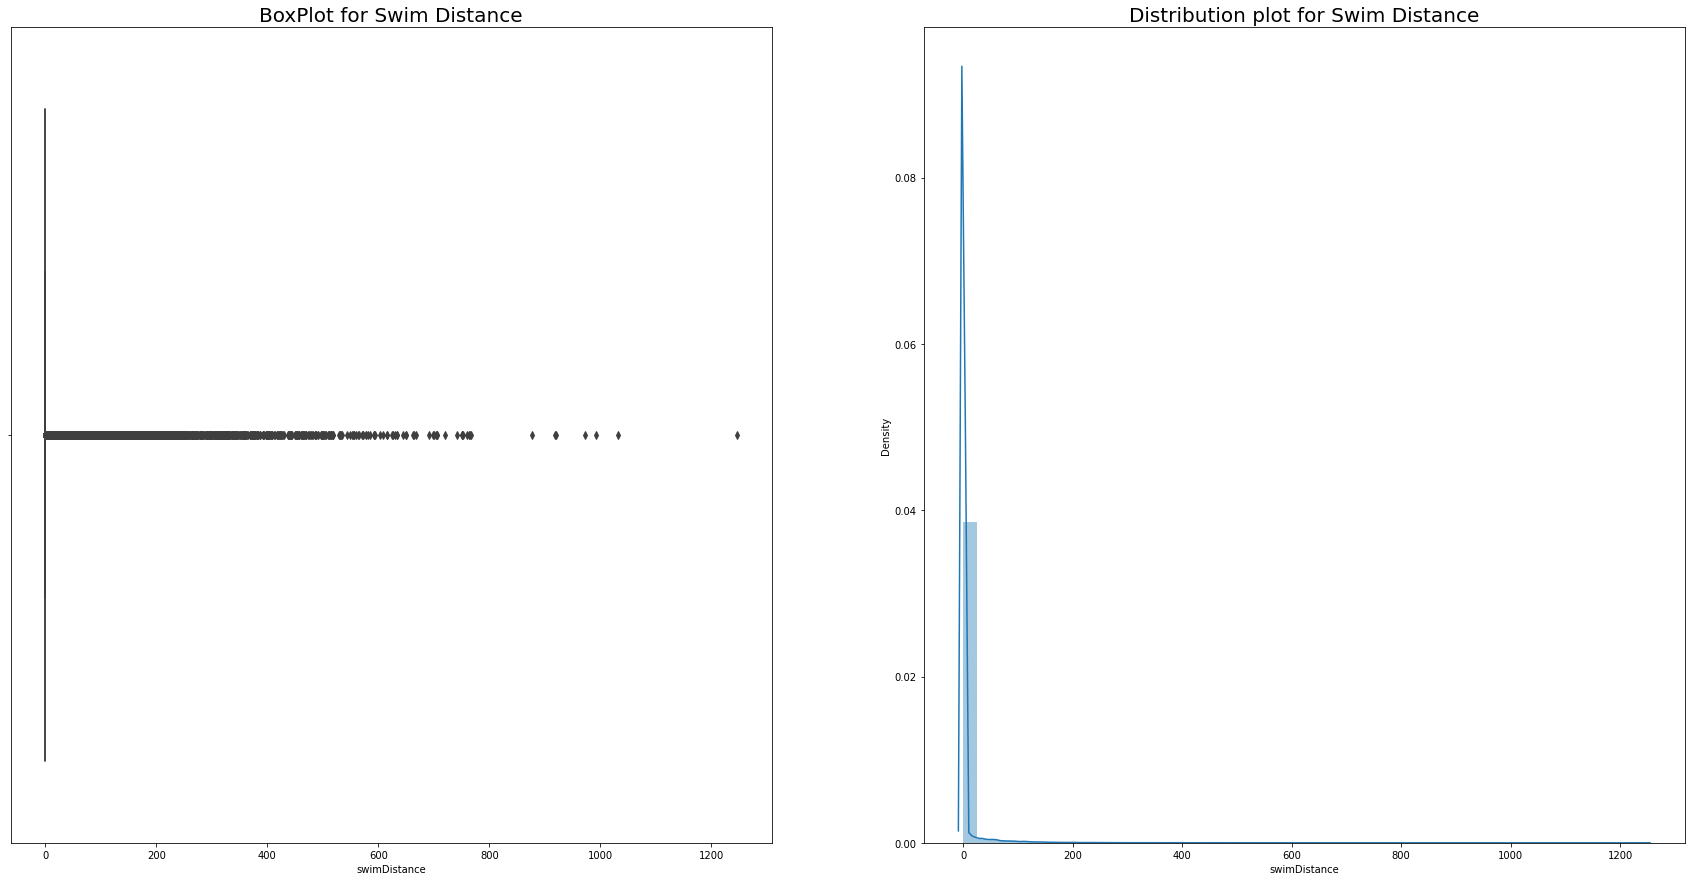

In [33]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['swimDistance'])
plt.title('BoxPlot for Swim Distance', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['swimDistance'])
plt.title('Distribution plot for Swim Distance', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

(array([ 0.,  5., 10., 15., 20., 25.]),
 <a list of 6 Text major ticklabel objects>)

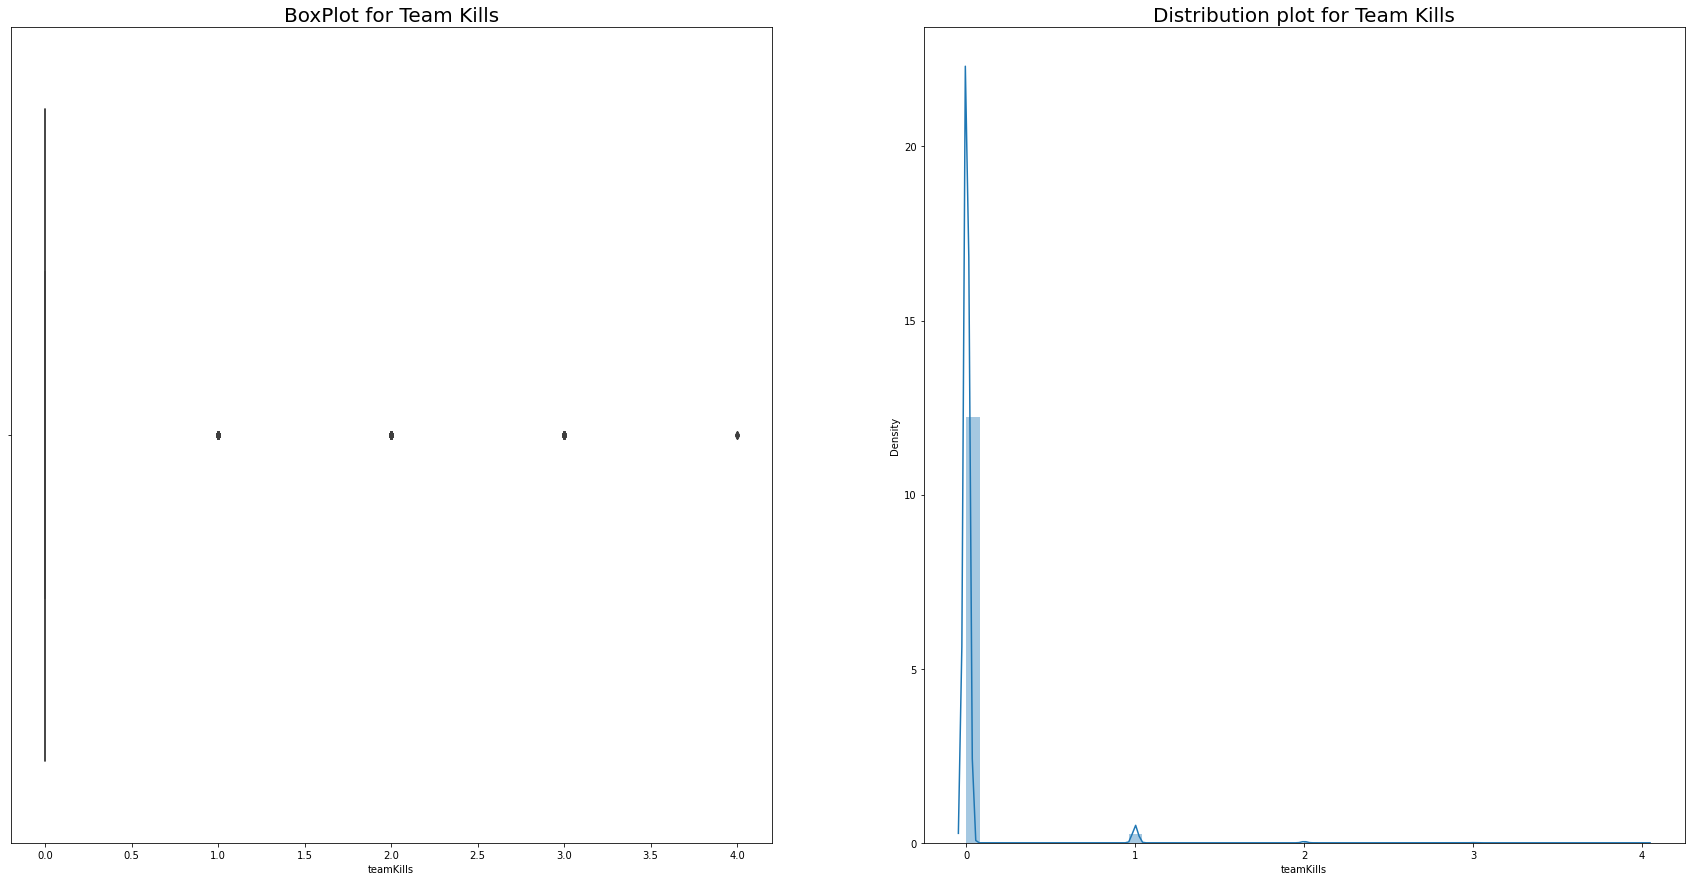

In [34]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['teamKills'])
plt.title('BoxPlot for Team Kills', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['teamKills'])
plt.title('Distribution plot for Team Kills', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text major ticklabel objects>)

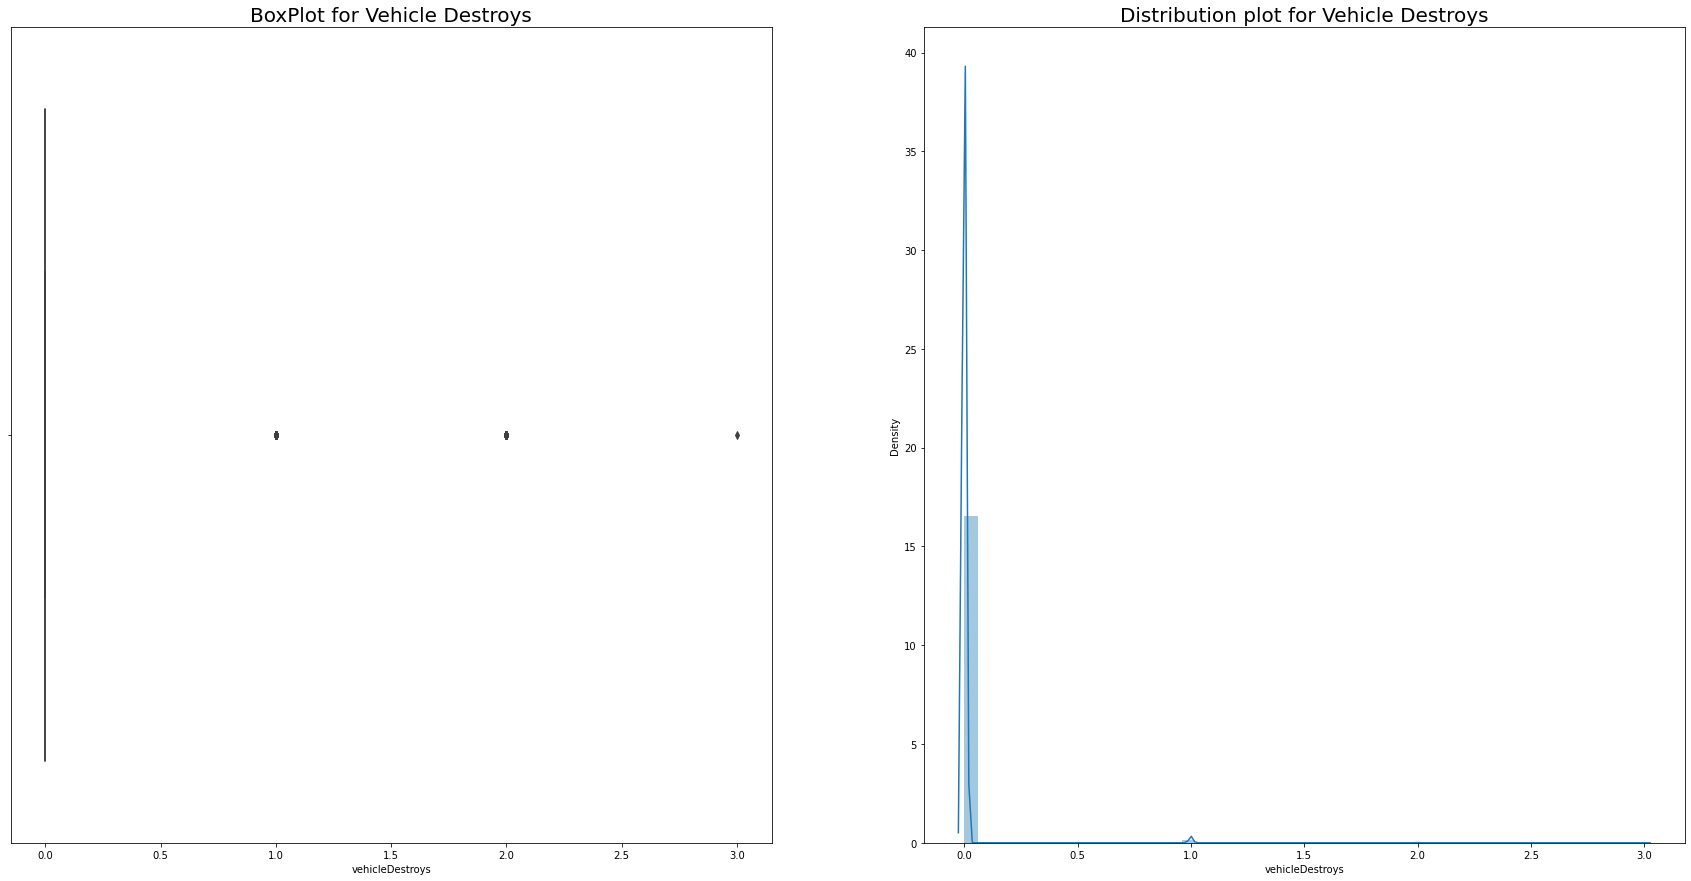

In [35]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['vehicleDestroys'])
plt.title('BoxPlot for Vehicle Destroys', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['vehicleDestroys'])
plt.title('Distribution plot for Vehicle Destroys', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

(array([0.    , 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.0012, 0.0014]),
 <a list of 8 Text major ticklabel objects>)

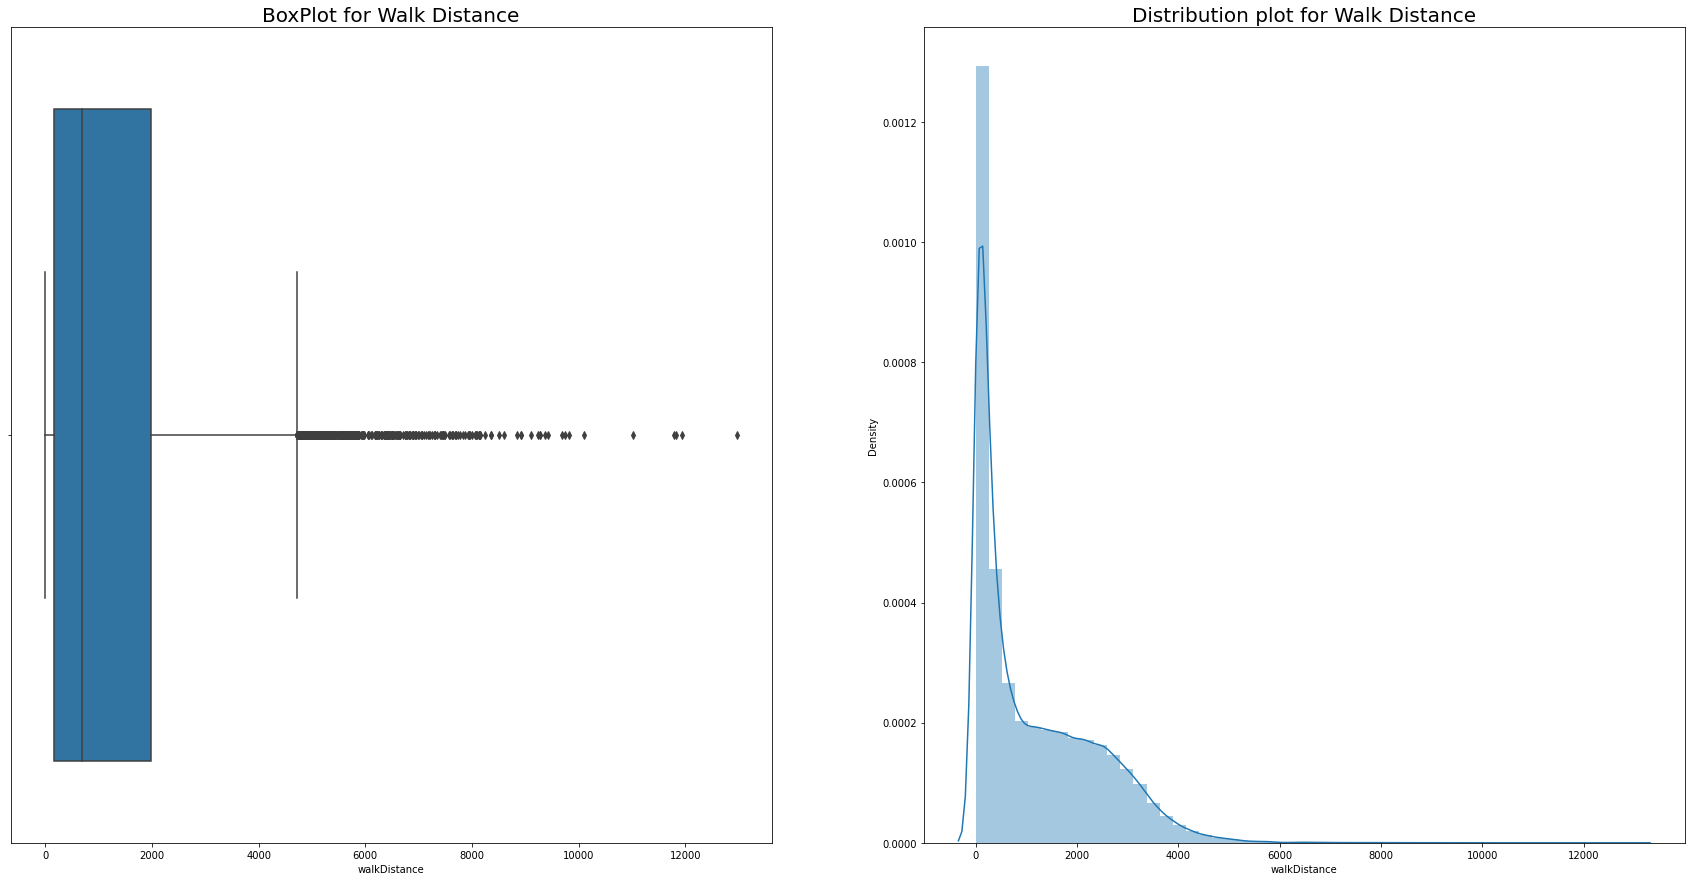

In [36]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['walkDistance'])
plt.title('BoxPlot for Walk Distance', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['walkDistance'])
plt.title('Distribution plot for Walk Distance', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 <a list of 8 Text major ticklabel objects>)

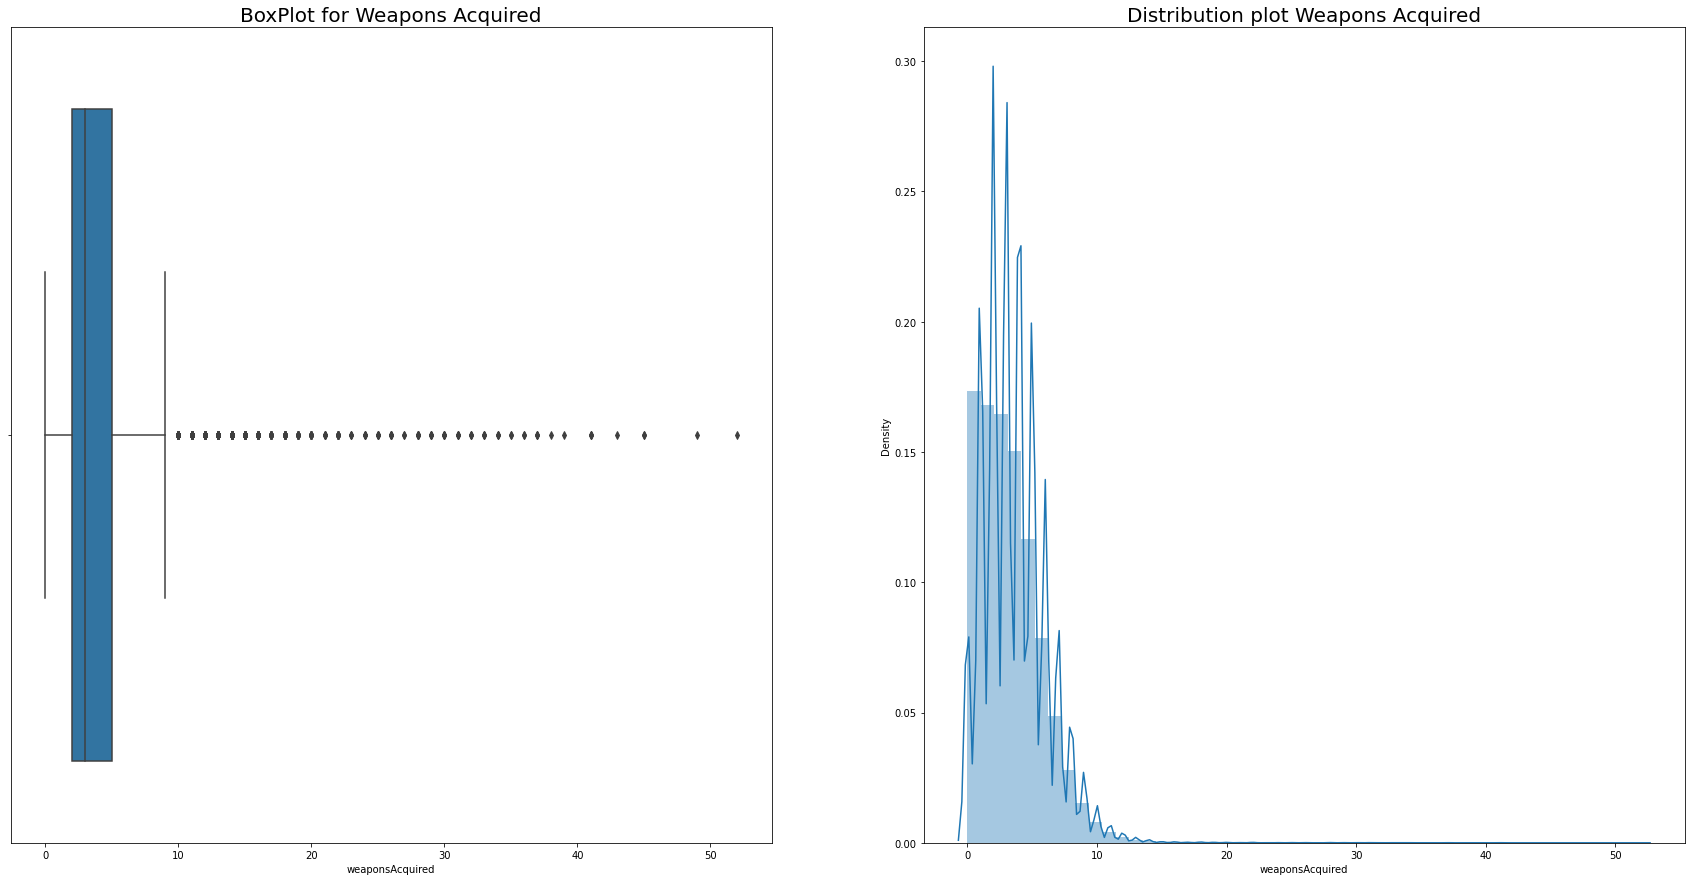

In [37]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['weaponsAcquired'])
plt.title('BoxPlot for Weapons Acquired', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['weaponsAcquired'])
plt.title('Distribution plot Weapons Acquired', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012]),
 <a list of 7 Text major ticklabel objects>)

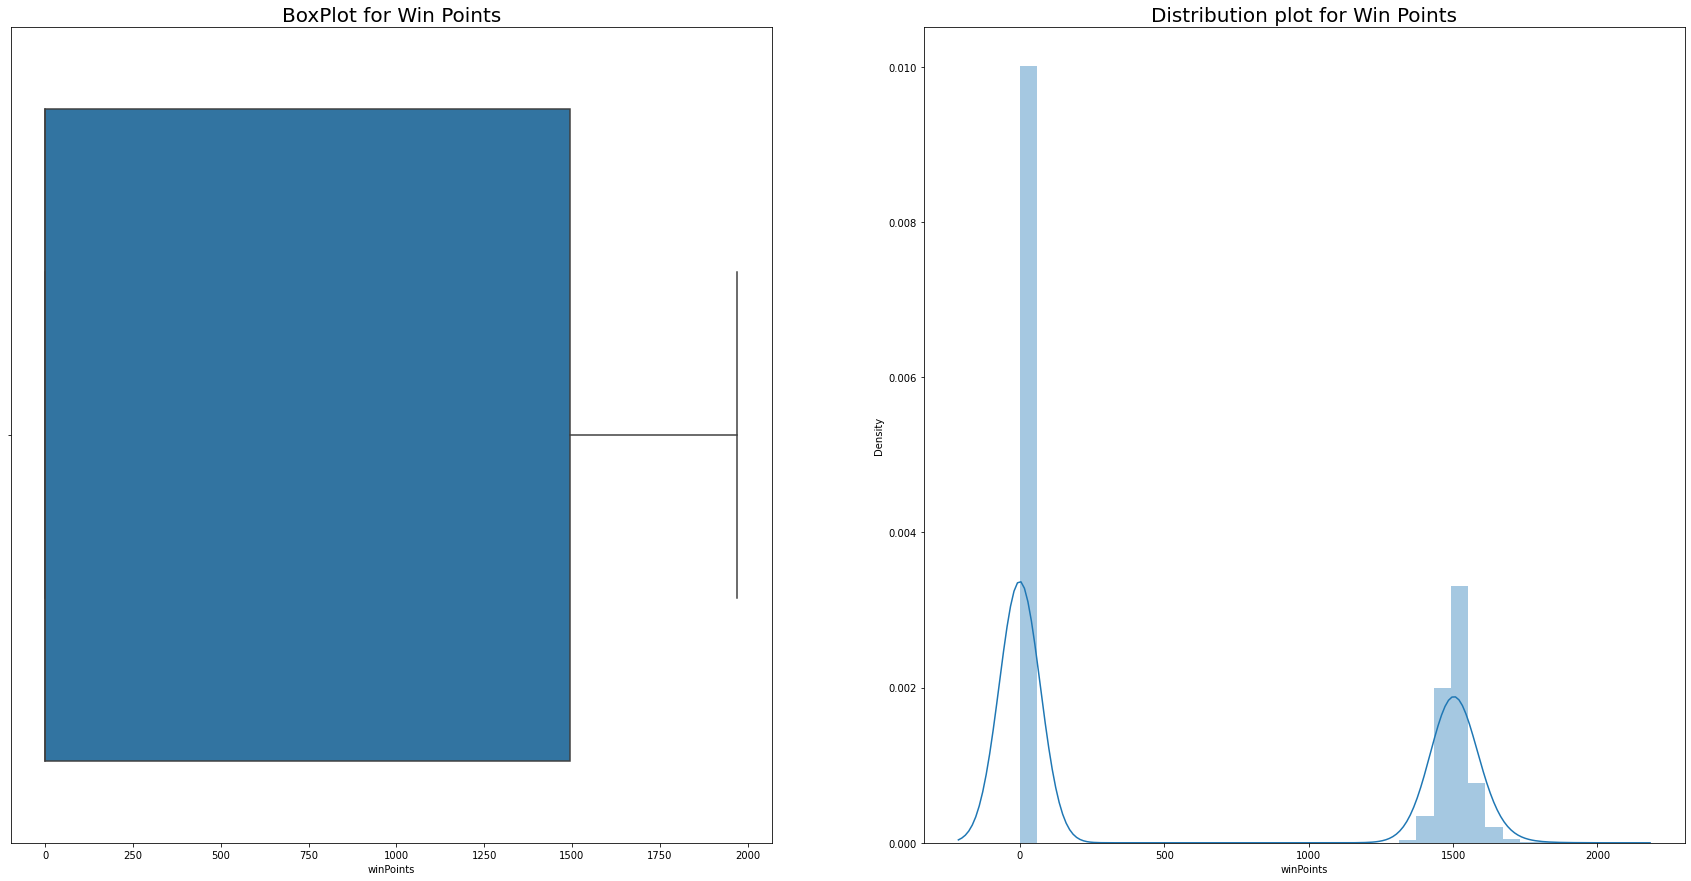

In [38]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['winPoints'])
plt.title('BoxPlot for Win Points', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['winPoints'])
plt.title('Distribution plot for Win Points', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14]),
 <a list of 8 Text major ticklabel objects>)

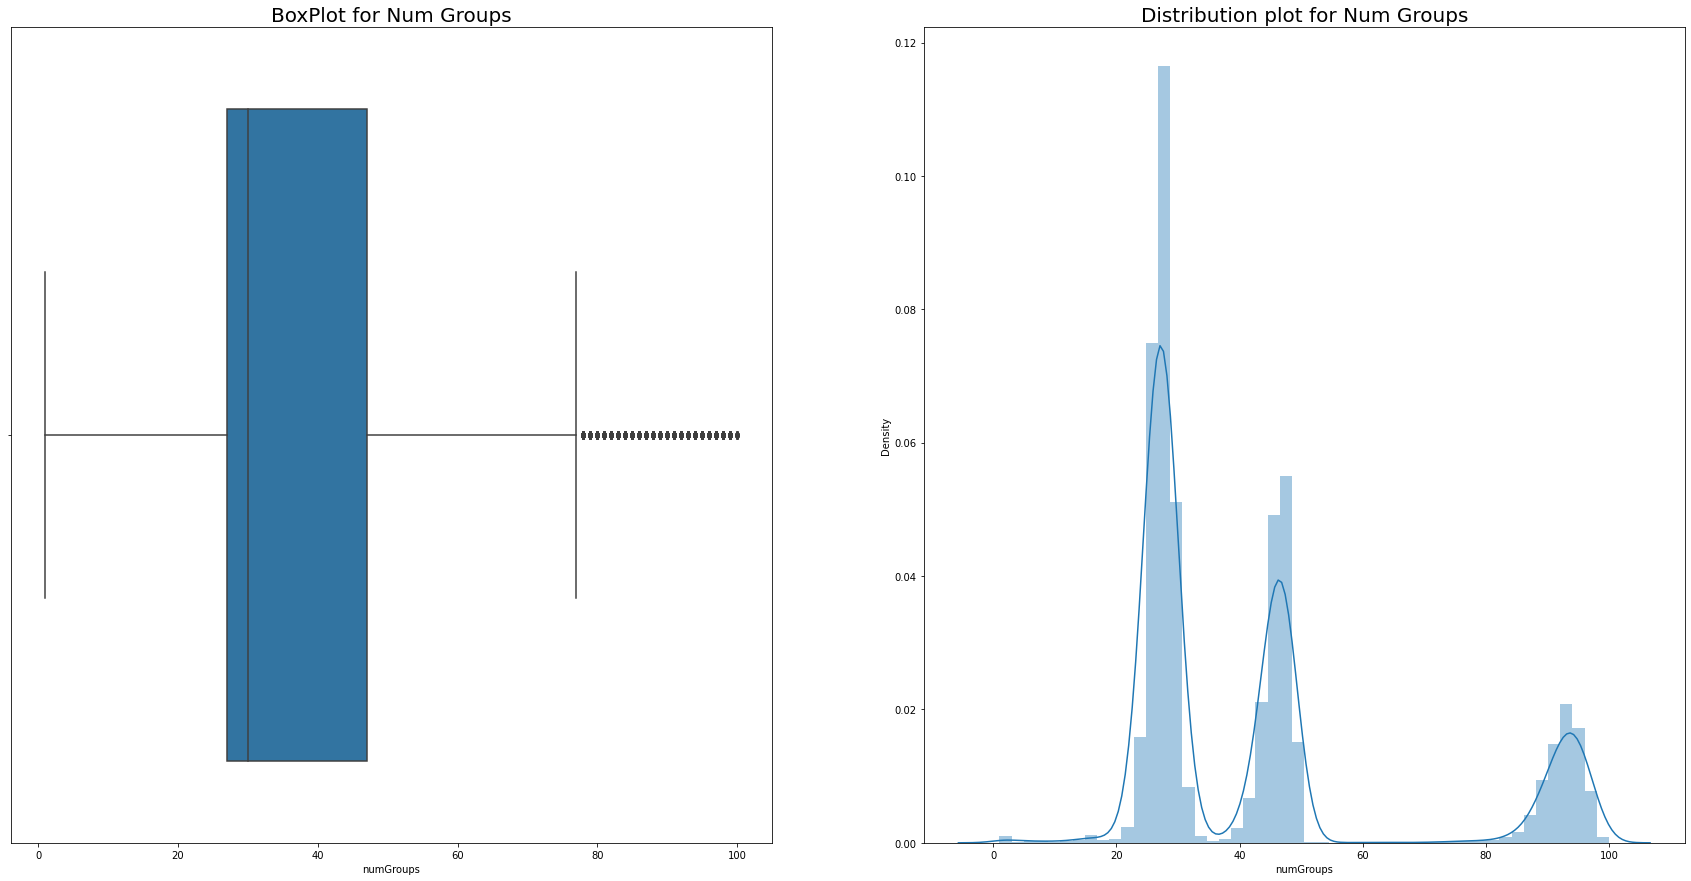

In [39]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['numGroups'])
plt.title('BoxPlot for Num Groups', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['numGroups'])
plt.title('Distribution plot for Num Groups', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

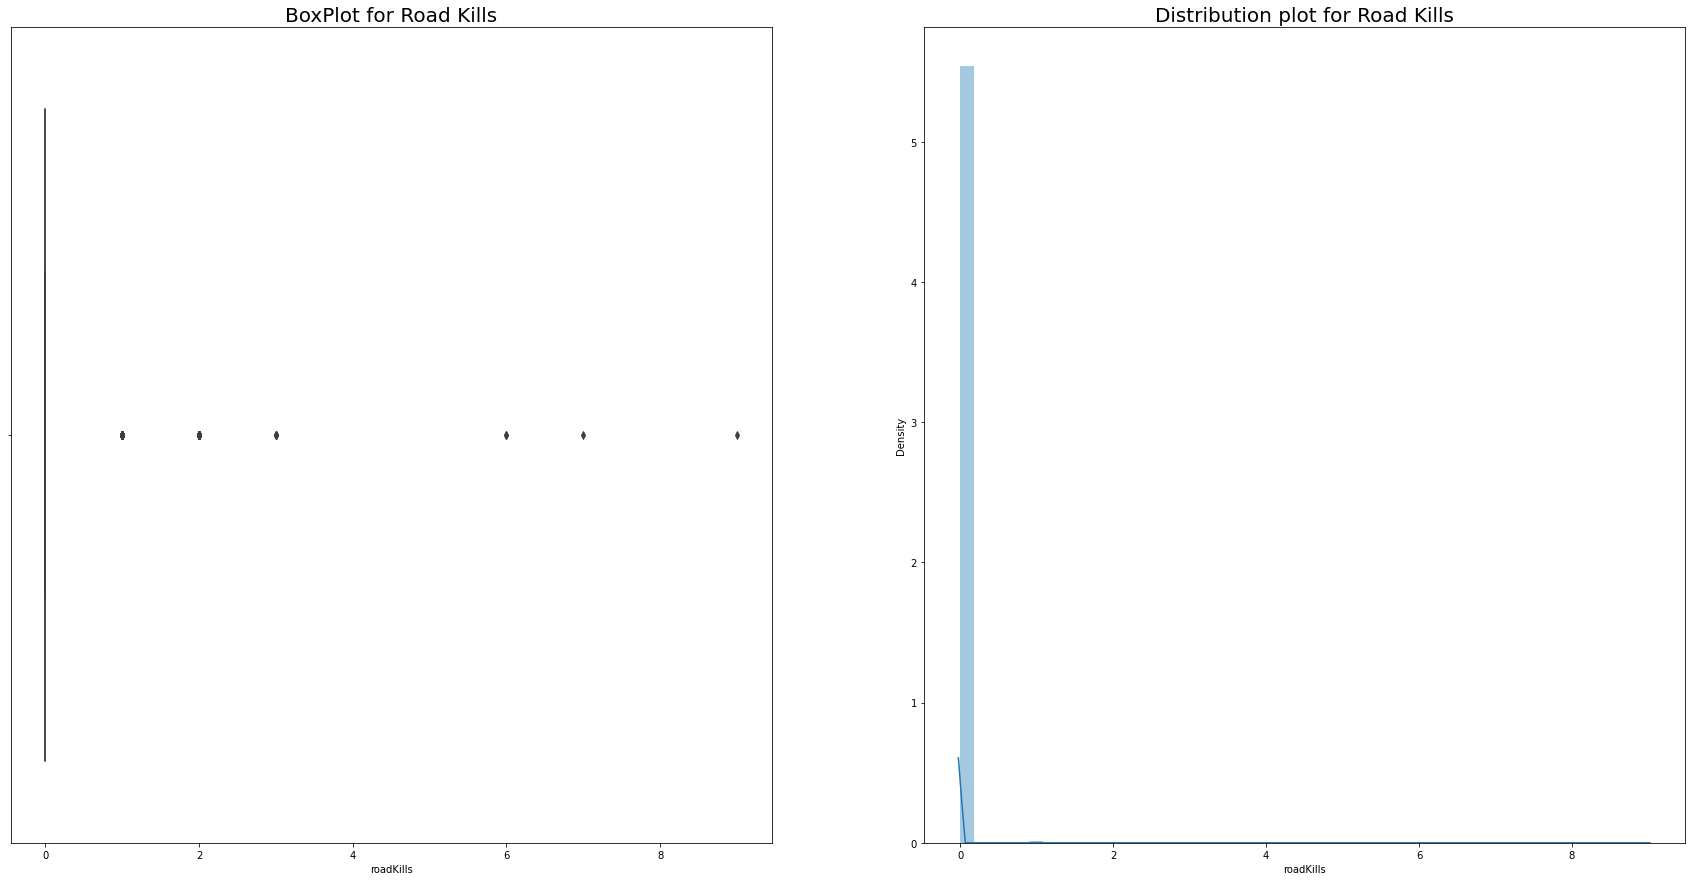

In [40]:
plt.figure(figsize=(30,15))

plt.subplot(121)
sns.boxplot(pubg['roadKills'])
plt.title('BoxPlot for Road Kills', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)

plt.subplot(122)
sns.distplot(pubg['roadKills'])
plt.title('Distribution plot for Road Kills', fontdict={'fontsize': 20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

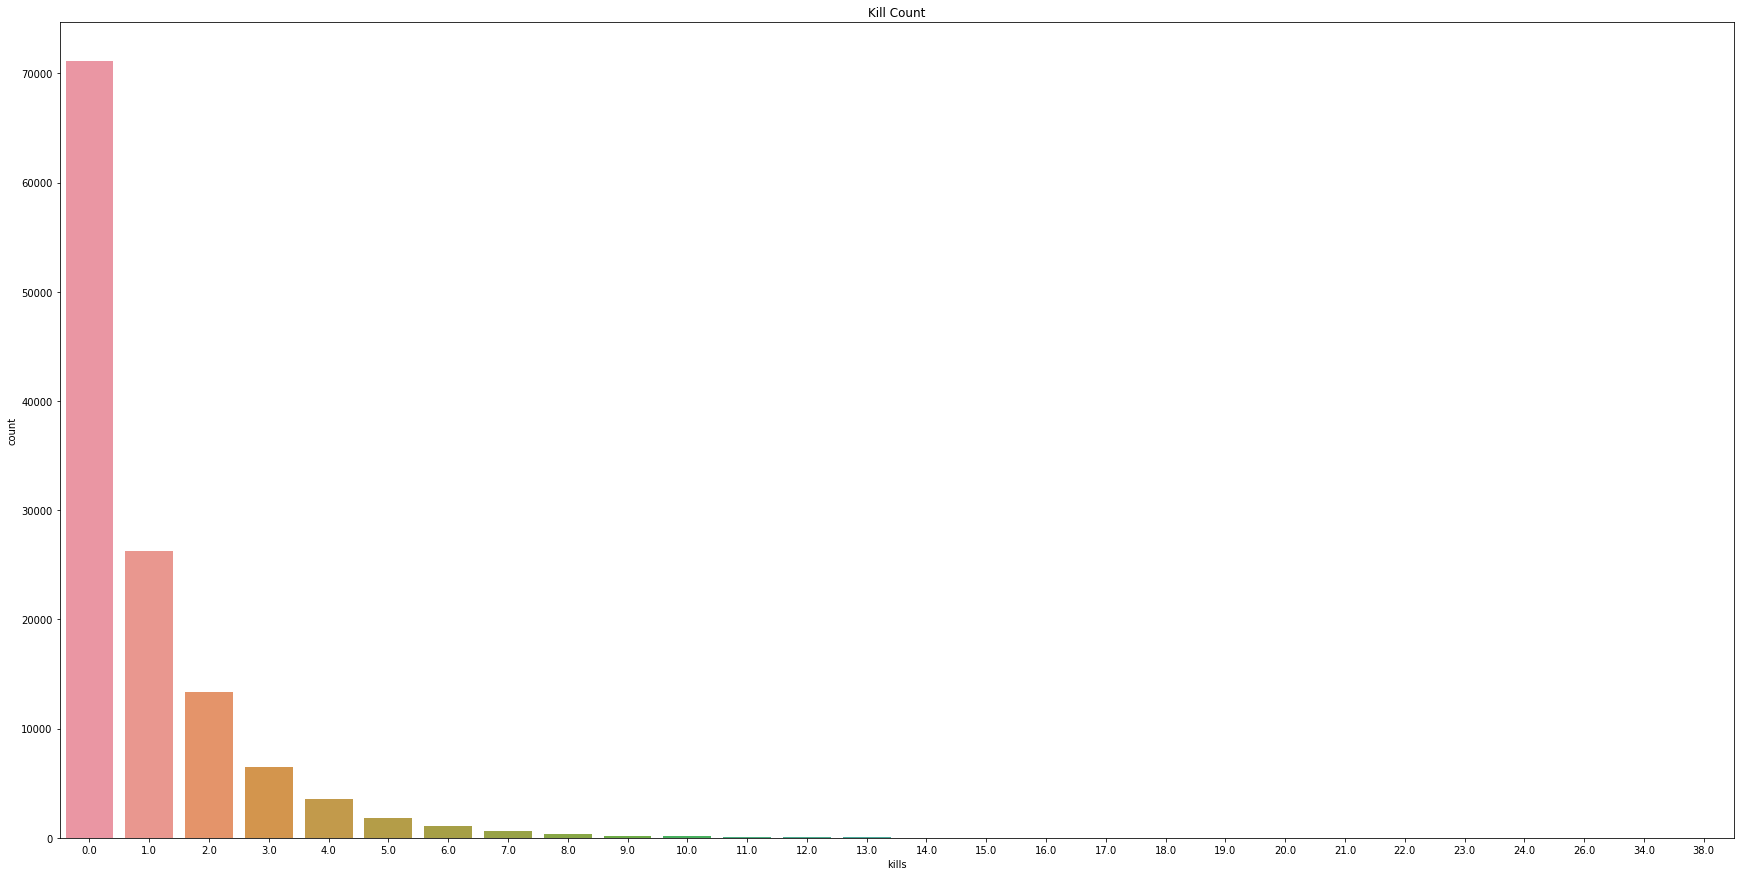

In [41]:
plt.figure(figsize=(30,15))

sns.countplot(pubg['kills'])
plt.title('Kill Count')

plt.show()

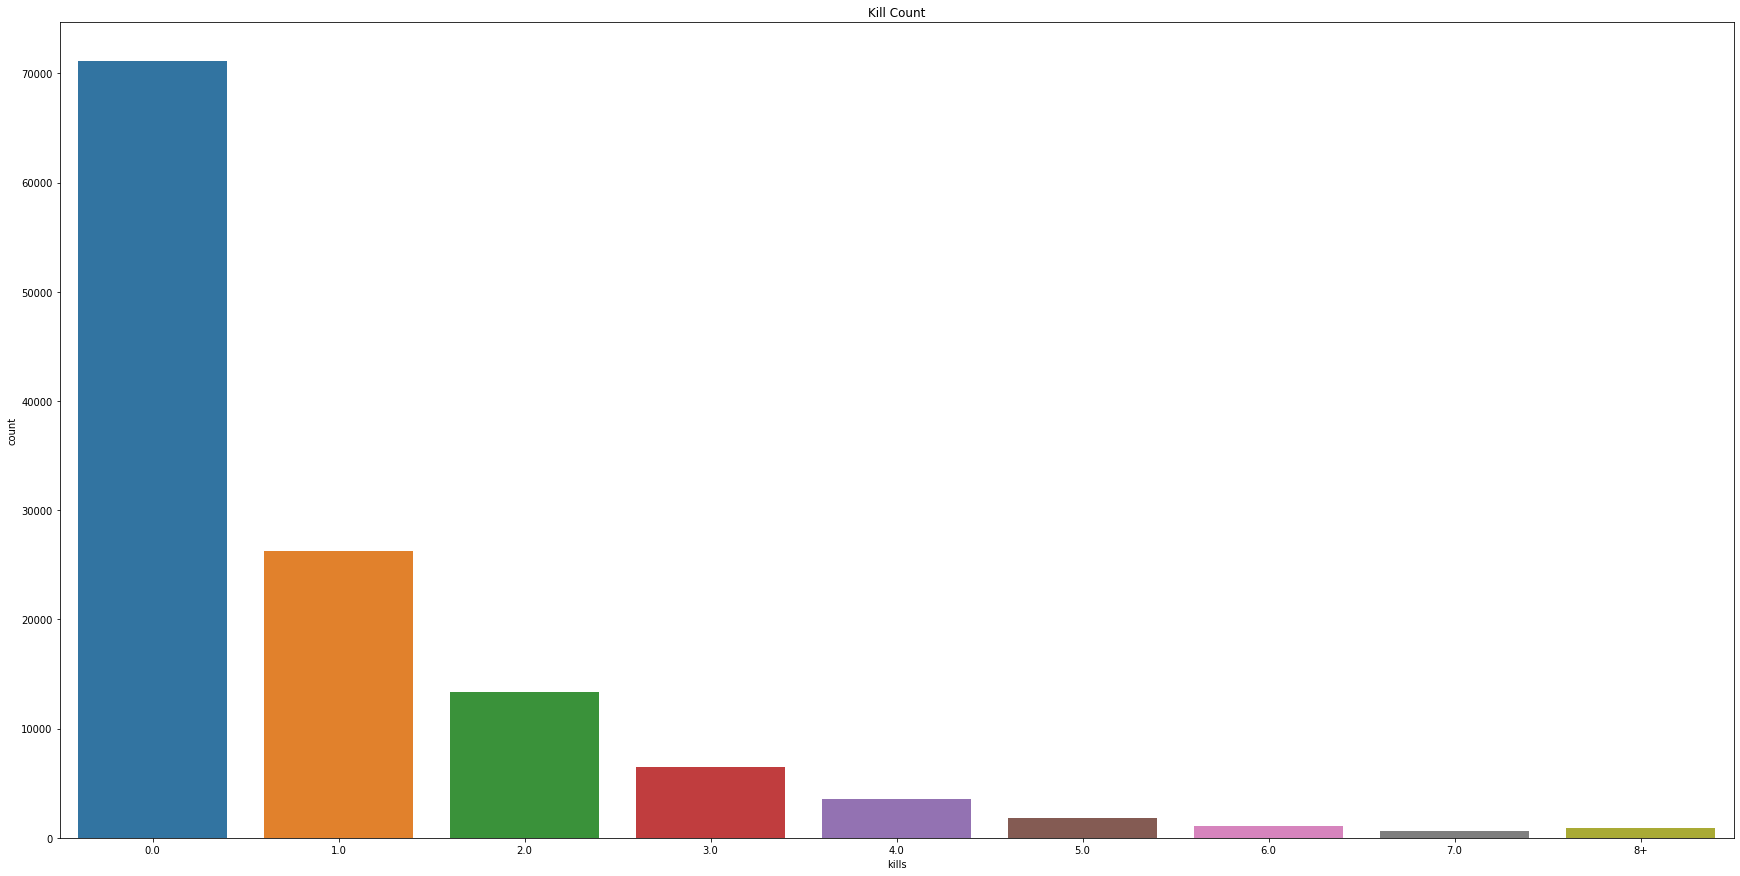

In [42]:
data = pubg.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'

plt.figure(figsize=(30,15))
sns.countplot(data['kills'].astype(str).sort_values())
plt.title("Kill Count")

plt.show()

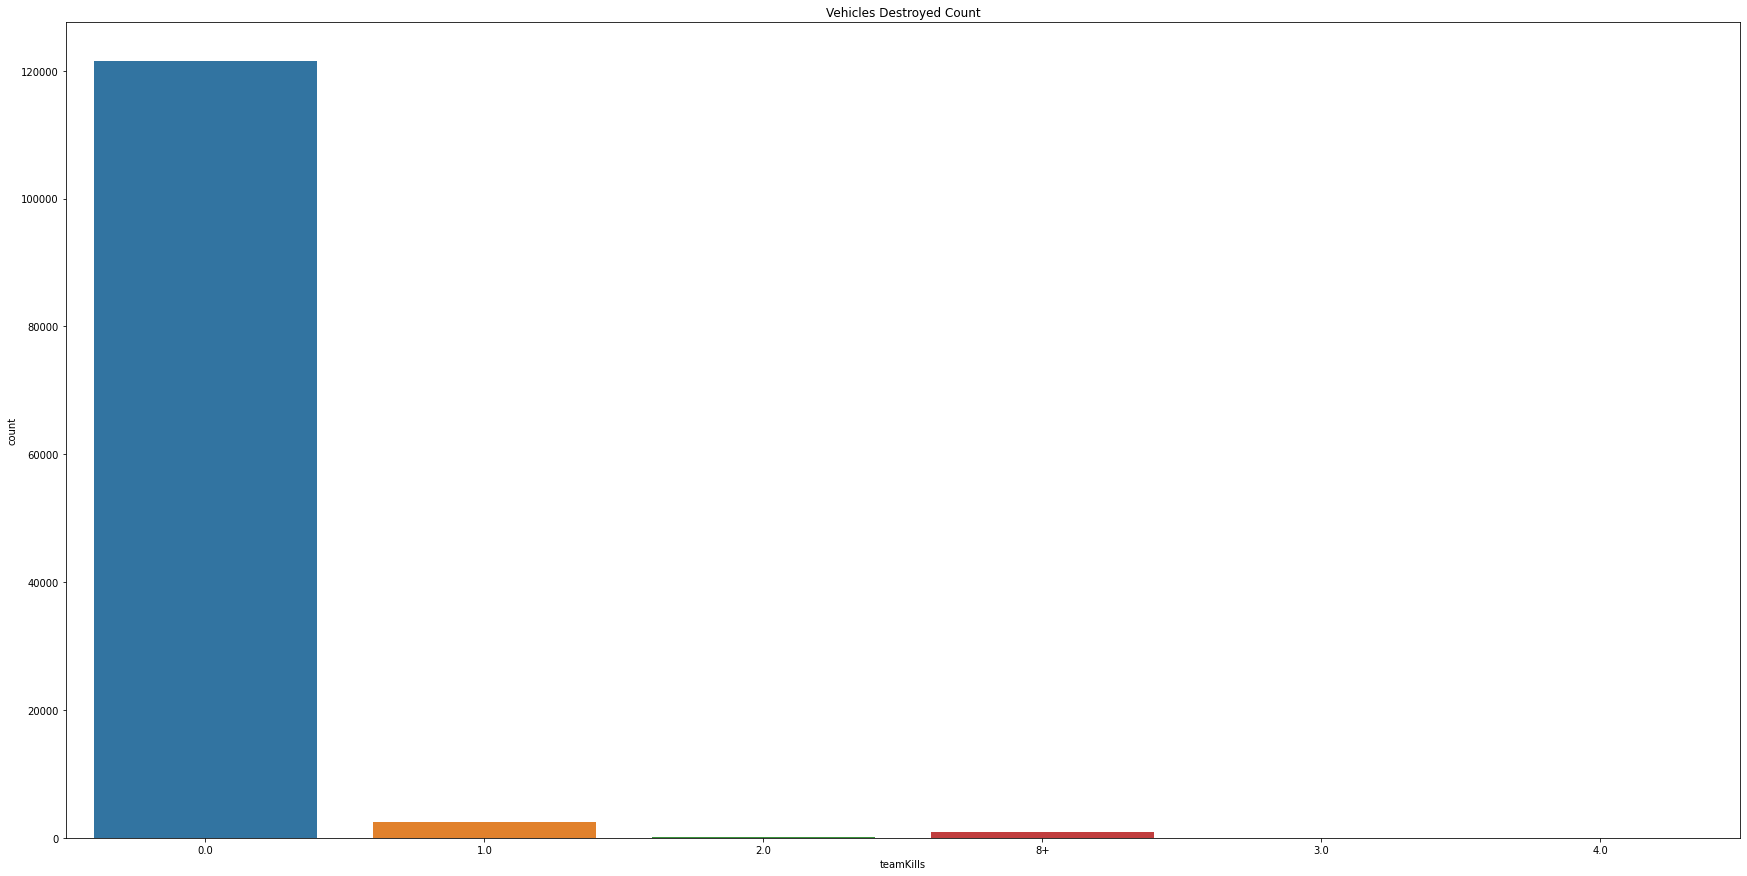

In [43]:
plt.figure(figsize=(30,15))
sns.countplot(data['teamKills'])
plt.title("Vehicles Destroyed Count")

plt.show()

## Bivariate Analysis

Let us look at what effect kills have on winning percentage

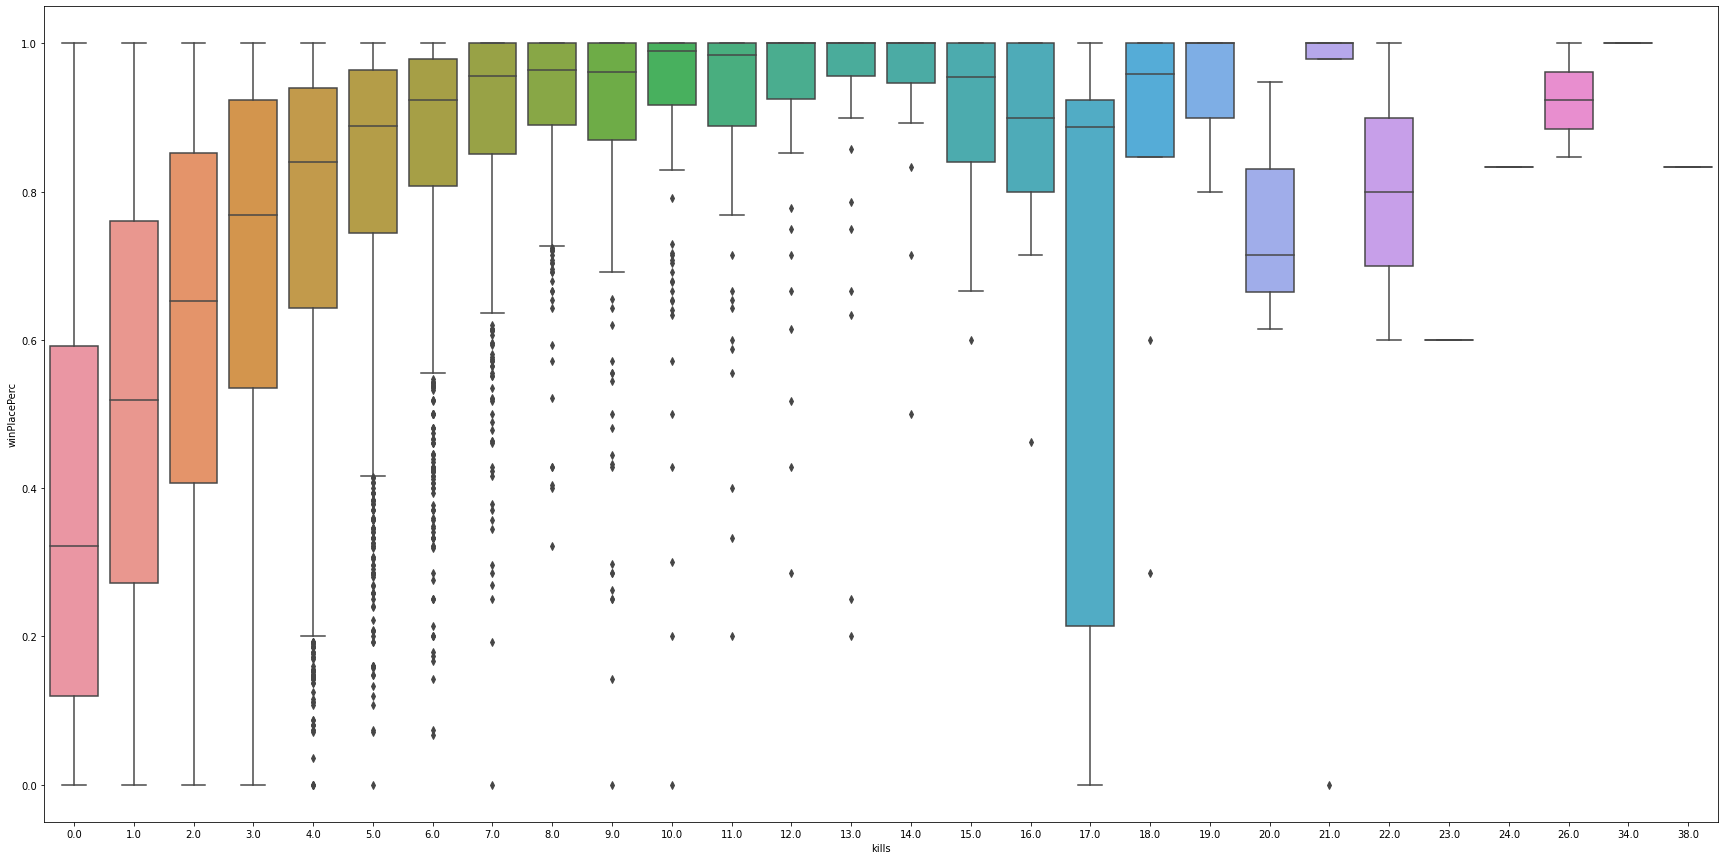

In [44]:
plt.figure(figsize = (30,15))
sns.boxplot(data = pubg, x = 'kills', y = 'winPlacePerc')
plt.show()

The above plot indicates that as the number of kills increases the winning percentage also increases, indicating a high correlation between the 2 columns.

<Figure size 2160x1080 with 0 Axes>

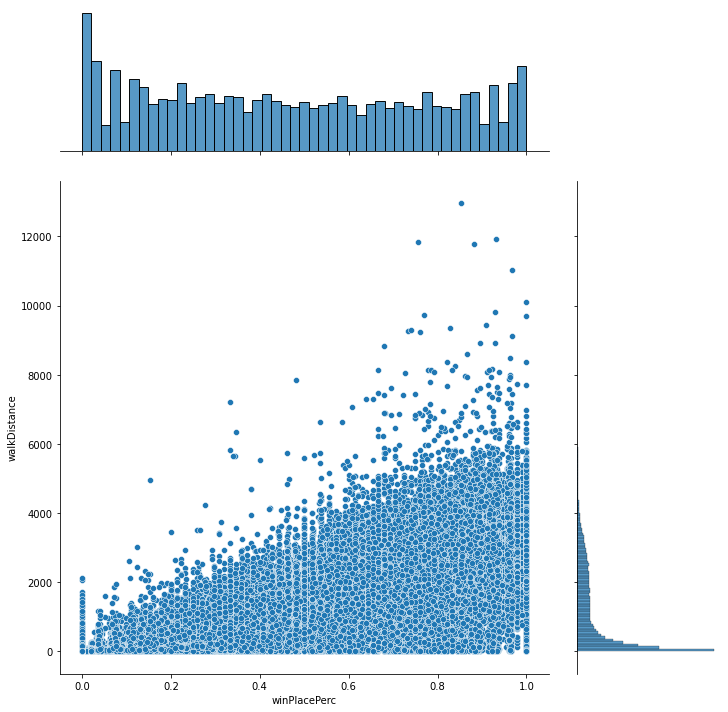

In [45]:
plt.figure(figsize=(30,15))
sns.jointplot(x = 'winPlacePerc', y = 'walkDistance', data = pubg, height = 10, ratio = 3)
plt.show()

The above plot indicates the presence of high correlation between the 2 columns.

<Figure size 2160x1080 with 0 Axes>

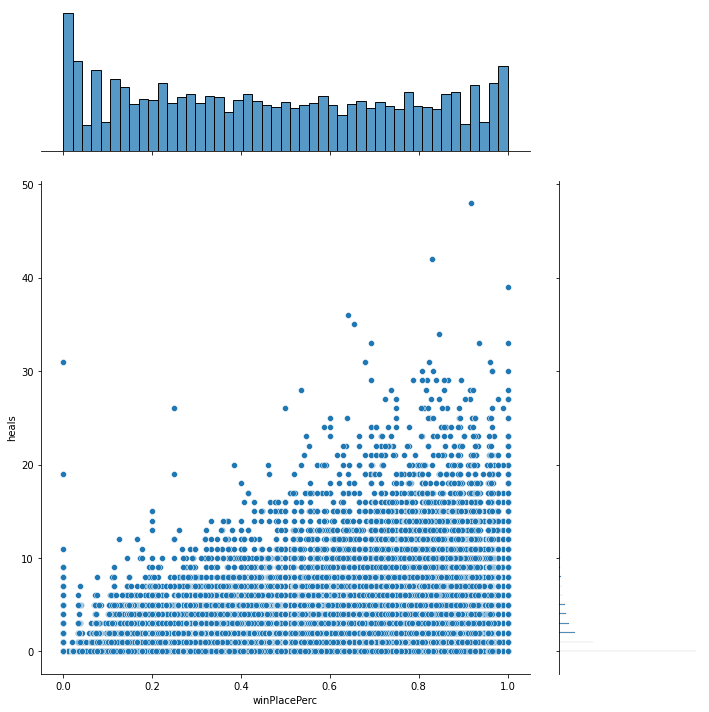

In [47]:
plt.figure(figsize=(30,15))
sns.jointplot(x = 'winPlacePerc', y = 'heals', data = pubg, height = 10, ratio = 3)
plt.show()

<Figure size 2160x1080 with 0 Axes>

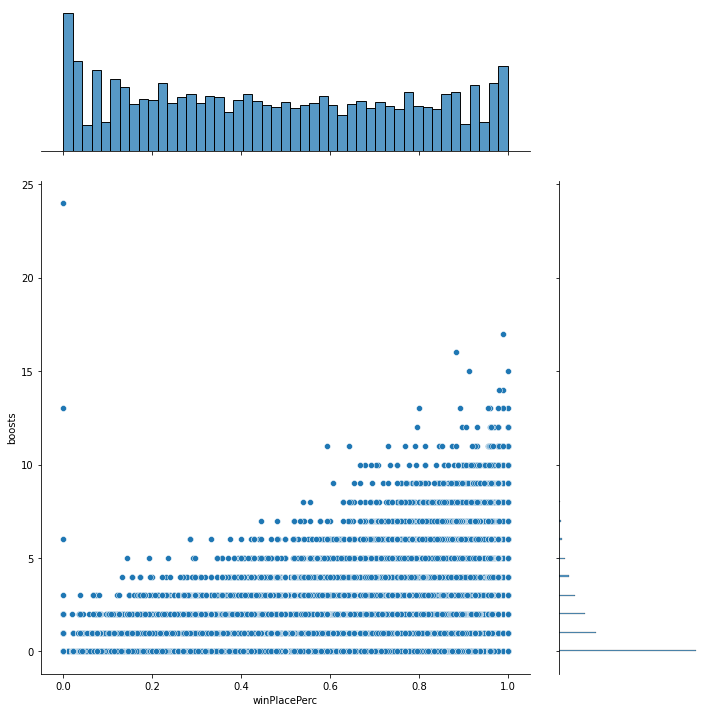

In [48]:
plt.figure(figsize=(30,15))
sns.jointplot(x = 'winPlacePerc', y = 'boosts', data = pubg, height = 10, ratio = 3)
plt.show()

<Figure size 2160x1080 with 0 Axes>

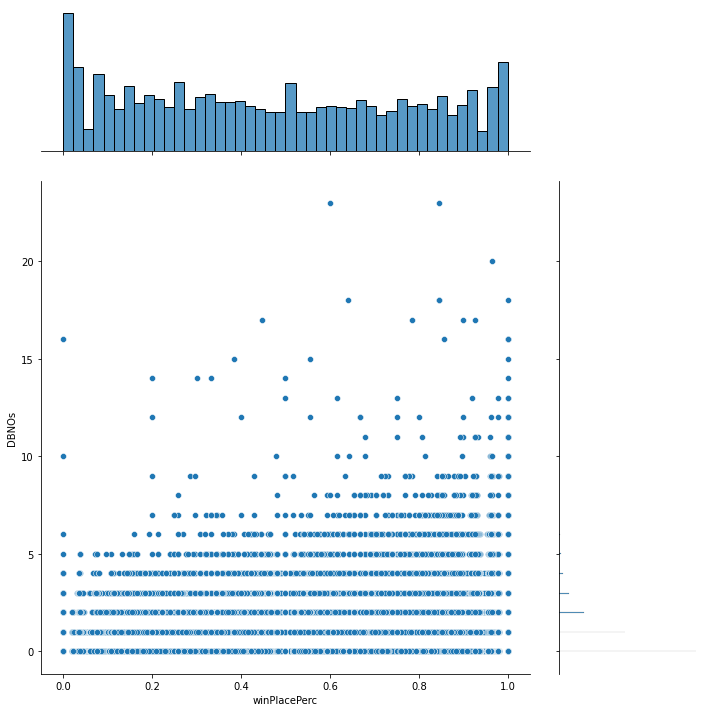

In [49]:
plt.figure(figsize=(30,15))
sns.jointplot(x = 'winPlacePerc', y = 'DBNOs', data = pubg[pubg['matchType'] != 'solo'], height = 10, ratio = 3)
plt.show()

<Figure size 2160x1080 with 0 Axes>

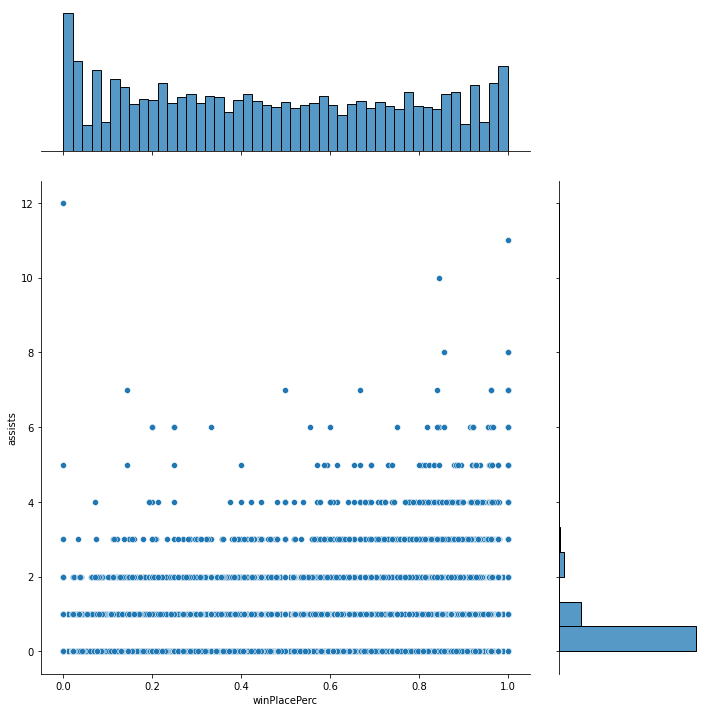

In [50]:
plt.figure(figsize=(30,15))
sns.jointplot(x = 'winPlacePerc', y = 'assists', data = pubg, height = 10, ratio = 3)
plt.show()

<Figure size 2160x1080 with 0 Axes>

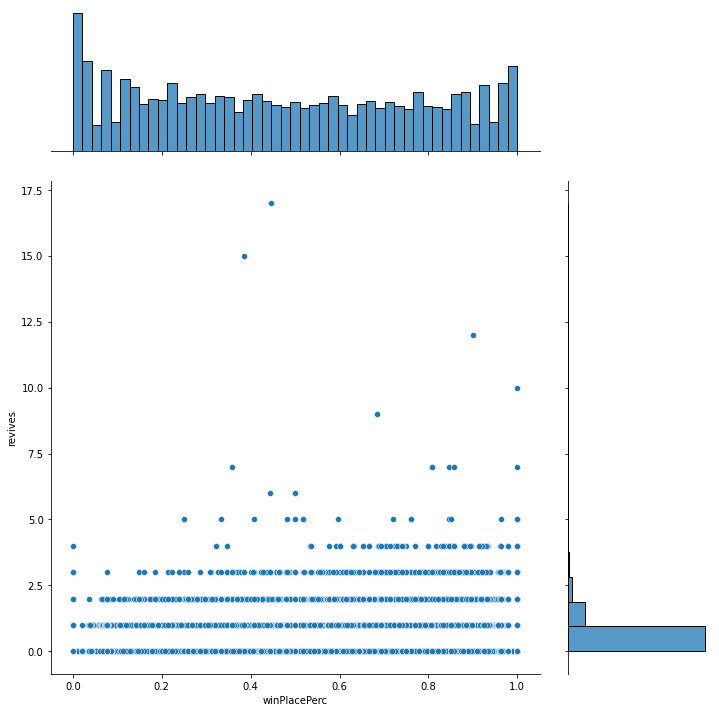

In [51]:
plt.figure(figsize=(30,15))
sns.jointplot(x = 'winPlacePerc', y = 'revives', data = pubg, height = 10, ratio = 3)
plt.show()

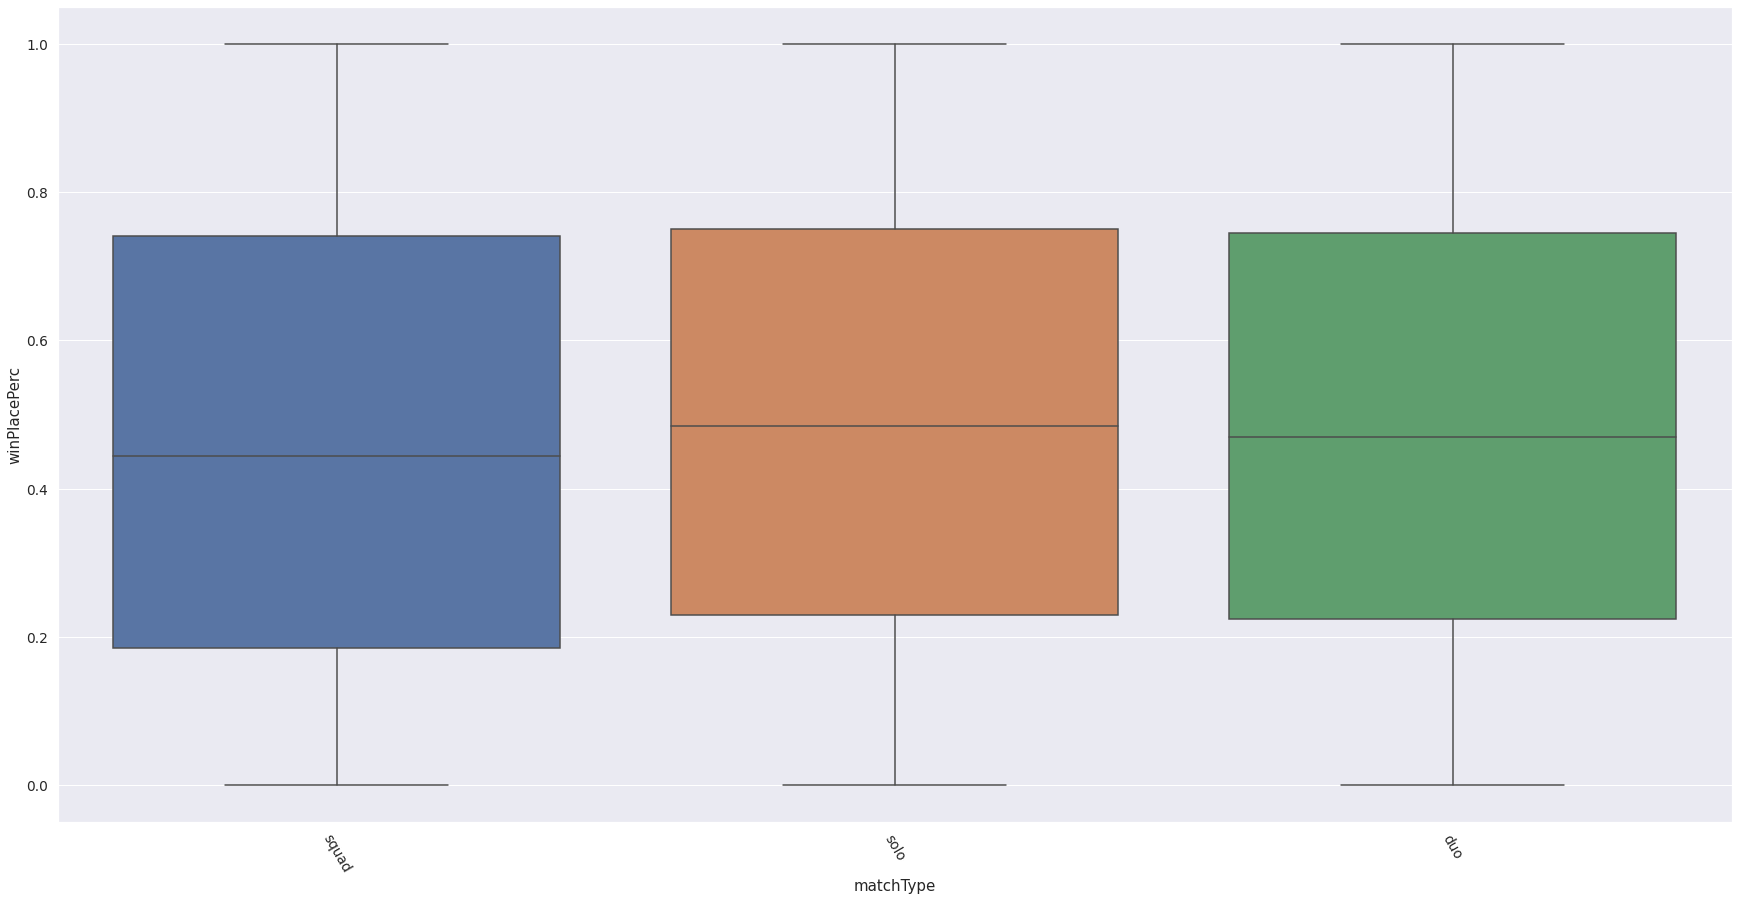

In [58]:
plt.figure(figsize=(30,15))

sns.boxplot(x = 'matchType', y = 'winPlacePerc', data = pubg)
plt.xticks(rotation = 300)

plt.show()

It seems that the type of match one plays does not have a big role in the winning percentage.

###Visualizing all the columns using pairplot

In [52]:
pubg.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
data = pubg[['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc']]

In [ ]:
sns.pairplot(pubg, hue = 'matchType')

###Checking the correlation between all the columns

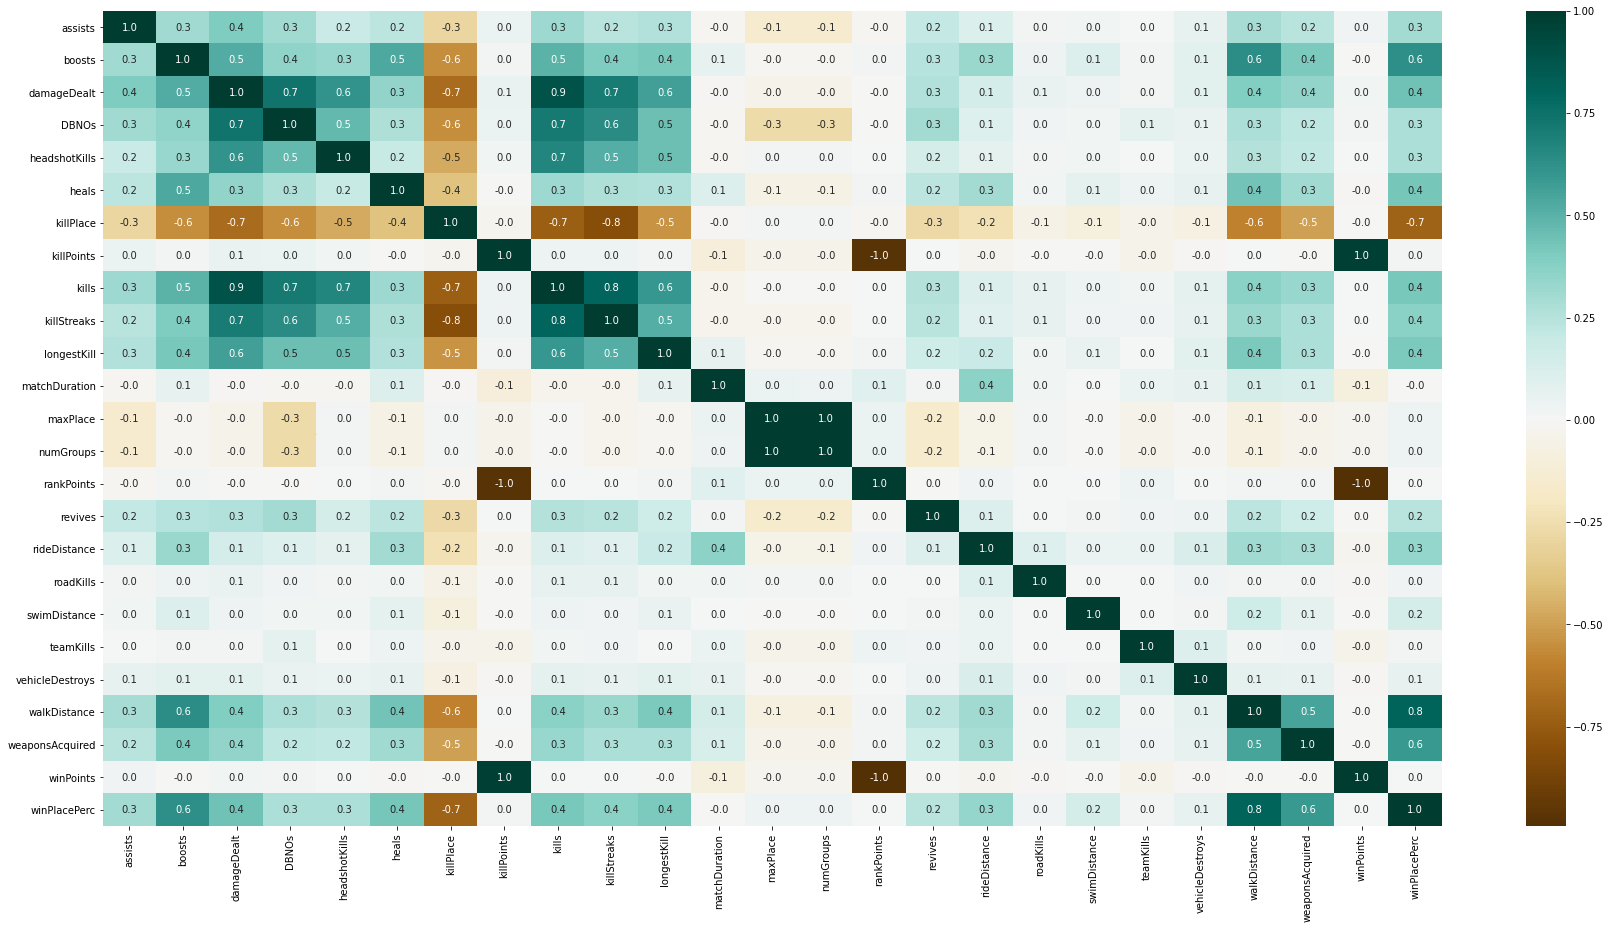

In [54]:
corr_matrix = pubg.corr()
plt.figure(figsize = (30,15))

sns.heatmap(pubg.corr(), annot = True, fmt = '.1f', cmap = 'BrBG')
sns.set(font_scale = 1.25)

plt.show()